In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

## 1. Load expression data

The `transformation` value can be one of `"none"`, `"sqrt"` or `"log"`, which determines how the expression data should be transformed in order to reduce outlier influence.

In [3]:
data_path: str = "data/Athaliana.csv"
transformation: str = "log"

In [4]:
# Parameters
data_path = "data/processed_data/germination.csv"
transformation = "sqrt"


In [5]:
from my_gatai import Expression_data

expression_data = Expression_data.from_csv(data_path, 
                                           transformation=transformation)
expression_data.full

,Phylostratum,GeneID,dry,imbibed,testa rupture,radicle,first root,greening,opening
0,0.618291,at1g01010,7.040502,5.987987,4.705897,4.591337,5.105047,5.145008,6.070010
1,0.618291,at1g01020,9.577023,12.528260,10.856195,9.637609,8.872181,8.458219,8.900163
2,0.618291,at1g01030,5.252610,5.471906,4.242302,4.624531,5.452262,5.461196,4.796889
3,0.618291,at1g01040,11.430131,13.021799,9.733862,8.988921,8.076421,7.762540,8.329544
4,0.618291,at1g01050,17.198347,15.757934,17.523287,19.623874,19.618384,21.014689,21.447457
...,...,...,...,...,...,...,...,...,...
24553,0.903697,atmg01330,21.456827,25.934794,23.904508,22.554520,19.989724,19.792096,17.423256
24554,0.618291,atmg01360,59.556511,54.419319,56.495955,56.315488,55.867925,56.001407,56.565657
24555,0.963841,atmg01370,22.849246,36.392552,38.927497,38.682094,36.973307,33.614163,31.200495
24556,0.963841,atmg01400,7.096223,10.723592,10.547524,9.800632,8.229588,8.215484,7.595770


In [6]:
expression_data.p_matrix

,dry,imbibed,testa rupture,radicle,first root,greening,opening
0,0.000021,0.000018,0.000014,0.000013,0.000015,0.000015,0.000018
1,0.000028,0.000037,0.000032,0.000028,0.000026,0.000025,0.000026
2,0.000016,0.000016,0.000012,0.000014,0.000016,0.000016,0.000014
3,0.000034,0.000038,0.000029,0.000026,0.000024,0.000023,0.000025
4,0.000051,0.000046,0.000052,0.000058,0.000058,0.000062,0.000063
...,...,...,...,...,...,...,...
24553,0.000093,0.000111,0.000103,0.000097,0.000086,0.000085,0.000075
24554,0.000177,0.000160,0.000166,0.000165,0.000164,0.000165,0.000166
24555,0.000106,0.000167,0.000178,0.000177,0.000169,0.000154,0.000143
24556,0.000033,0.000049,0.000048,0.000045,0.000038,0.000038,0.000035


In [7]:
expression_data.tai

dry              0.678245
imbibed          0.674662
testa rupture    0.672417
radicle          0.671968
first root       0.671716
greening         0.672485
opening          0.673981
dtype: float64

### 1.1 Compute TAI value

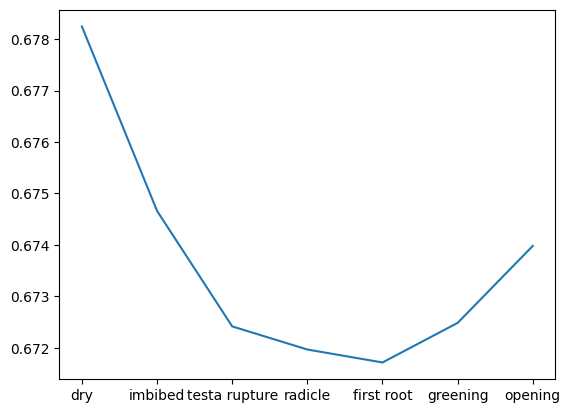

In [8]:
import matplotlib.pyplot as plt

plt.plot(expression_data.tai)
plt.show()

## 2. Flatline test

### 2.1. Compute variance of TAI curve

In [9]:
import numpy as np
tai_var = np.var(expression_data.tai).item()
tai_var

4.52723679740934e-06

### 2.2. Compute permutation variance distribution

Permute the assigned gene ages between the genes to run the flat line test

In [10]:
from gatai.utils import comp_vars

num_permutations = 10000
permutation_comp_vars = comp_vars(expression_data, num_permutations)

Running permuations


  0%|                                                                                                                                                                                          | 0/10000 [00:00<?, ?it/s]

  2%|███▊                                                                                                                                                                          | 220/10000 [00:00<00:04, 2193.04it/s]

  4%|███████▋                                                                                                                                                                      | 444/10000 [00:00<00:04, 2214.95it/s]

  7%|███████████▌                                                                                                                                                                  | 666/10000 [00:00<00:04, 2206.69it/s]

  9%|███████████████▍                                                                                                                                                              | 887/10000 [00:00<00:04, 2203.59it/s]

 11%|███████████████████▍                                                                                                                                                         | 1125/10000 [00:00<00:03, 2265.45it/s]

 14%|███████████████████████▍                                                                                                                                                     | 1352/10000 [00:00<00:03, 2244.79it/s]

 16%|███████████████████████████▌                                                                                                                                                 | 1592/10000 [00:00<00:03, 2292.53it/s]

 18%|███████████████████████████████▌                                                                                                                                             | 1822/10000 [00:00<00:03, 2073.00it/s]

 21%|███████████████████████████████████▋                                                                                                                                         | 2060/10000 [00:00<00:03, 2159.85it/s]

 23%|███████████████████████████████████████▋                                                                                                                                     | 2296/10000 [00:01<00:03, 2218.09it/s]

 25%|███████████████████████████████████████████▌                                                                                                                                 | 2521/10000 [00:01<00:03, 2209.79it/s]

 28%|███████████████████████████████████████████████▋                                                                                                                             | 2759/10000 [00:01<00:03, 2259.10it/s]

 30%|███████████████████████████████████████████████████▊                                                                                                                         | 2997/10000 [00:01<00:03, 2292.99it/s]

 32%|████████████████████████████████████████████████████████                                                                                                                     | 3242/10000 [00:01<00:02, 2339.00it/s]

 35%|████████████████████████████████████████████████████████████▏                                                                                                                | 3477/10000 [00:01<00:02, 2298.02it/s]

 37%|████████████████████████████████████████████████████████████████▍                                                                                                            | 3725/10000 [00:01<00:02, 2349.34it/s]

 40%|████████████████████████████████████████████████████████████████████▌                                                                                                        | 3961/10000 [00:01<00:02, 2349.13it/s]

 42%|████████████████████████████████████████████████████████████████████████▋                                                                                                    | 4201/10000 [00:01<00:02, 2363.20it/s]

 44%|████████████████████████████████████████████████████████████████████████████▊                                                                                                | 4438/10000 [00:01<00:02, 2356.06it/s]

 47%|████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 4674/10000 [00:02<00:02, 2349.94it/s]

 49%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 4910/10000 [00:02<00:02, 2312.99it/s]

 51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 5145/10000 [00:02<00:02, 2321.10it/s]

 54%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                | 5379/10000 [00:02<00:01, 2326.38it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 5612/10000 [00:02<00:01, 2286.31it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 5850/10000 [00:02<00:01, 2311.28it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 6082/10000 [00:02<00:01, 2272.60it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 6310/10000 [00:02<00:01, 2272.32it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 6540/10000 [00:02<00:01, 2279.74it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 6769/10000 [00:02<00:01, 2258.02it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 6996/10000 [00:03<00:01, 2258.77it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 7234/10000 [00:03<00:01, 2291.91it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 7464/10000 [00:03<00:01, 2255.77it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 7690/10000 [00:03<00:01, 2115.91it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 7927/10000 [00:03<00:00, 2186.68it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 8148/10000 [00:03<00:00, 2187.89it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 8387/10000 [00:03<00:00, 2244.44it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 8625/10000 [00:03<00:00, 2281.93it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 8854/10000 [00:03<00:00, 2255.25it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 9092/10000 [00:04<00:00, 2289.29it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 9322/10000 [00:04<00:00, 2258.12it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 9560/10000 [00:04<00:00, 2291.50it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 9790/10000 [00:04<00:00, 2258.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2263.20it/s]

### 2.3. Fit the random variances to a Gamma distribution and compute the p-value of the true TAI

In [11]:
from flatline import fit_gamma, p_value_function

# NOTE: the default fitting method used by scipy doesn't achieve a very good fit, so use "MM"
a, loc, scale = fit_gamma(permutation_comp_vars)
get_p_value = p_value_function(a, loc, scale)
print("Gamma fit params:", a, loc, scale)

Gamma fit params: 0.6677502040964077 1.4025726321273649e-08 9.310726913961684e-08


In [12]:
print("p-value of TAI:", get_p_value(tai_var))

p-value of TAI: 1.7963294869539722e-22


### 2.4. Visually compare the random TAI variances against the true one

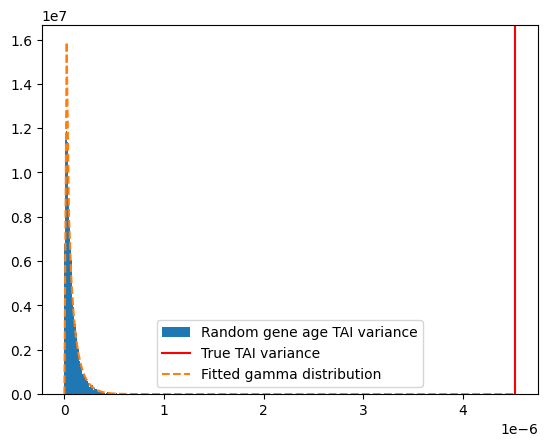

In [13]:
from scipy import stats
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")

x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")

plt.legend()
plt.show()

## 3. Destroy TAI signal with GATAI

### 3.1 Run genetic algorithm to extract genes that break the pattern
Note that the transformation used for the expression data heavily influences the number of genes that get extracted, as well as the number of generations needed for convergence.

Also, with transformations applied, older genes are better represented

In [14]:
from my_gatai import get_extracted_genes

ga_genes = get_extracted_genes(expression_data, permutation_comp_vars)

gen	island	Num removed	Variance
0  	      	4          	1.99265 


10 	1     	464        	1.76904 
10 	2     	347        	1.80257 
10 	3     	455        	1.8424  
10 	4     	357        	1.9116  




20 	1     	548        	1.7599  
20 	2     	888        	1.66721 
20 	3     	688        	1.73182 
20 	4     	689        	1.77658 




30 	1     	608        	1.70968 
30 	2     	526        	1.70963 
30 	3     	979        	1.65099 
30 	4     	1199       	1.63018 




40 	1     	1246       	1.60909 
40 	2     	1377       	1.605   
40 	3     	1339       	1.61806 
40 	4     	1271       	1.62854 




50 	1     	1053       	1.60944 
50 	2     	1328       	1.56955 
50 	3     	1415       	1.57425 
50 	4     	1769       	1.57714 




60 	1     	1039       	1.57142 
60 	2     	1199       	1.53598 
60 	3     	1393       	1.54578 
60 	4     	1511       	1.55468 




70 	1     	1394       	1.53062 
70 	2     	1209       	1.5252  
70 	3     	1200       	1.48128 
70 	4     	1637       	1.52324 




80 	1     	1385       	1.4588  
80 	2     	1121       	1.51094 
80 	3     	1354       	1.46292 
80 	4     	1371       	1.46696 




90 	1     	1414       	1.42323 
90 	2     	1379       	1.43775 
90 	3     	1543       	1.43761 
90 	4     	1572       	1.44754 




100	1     	1447       	1.42263 
100	2     	1491       	1.40646 
100	3     	1518       	1.41549 
100	4     	1469       	1.42627 




110	1     	1567       	1.39923 
110	2     	1425       	1.40384 
110	3     	1567       	1.3994  
110	4     	1599       	1.38565 




120	1     	1804       	1.36746 
120	2     	1604       	1.37176 
120	3     	1861       	1.38263 
120	4     	1881       	1.36339 




130	1     	1775       	1.34895 
130	2     	1981       	1.35258 
130	3     	1985       	1.35161 
130	4     	1902       	1.35494 




140	1     	2073       	1.33028 
140	2     	1988       	1.34026 
140	3     	1554       	1.34451 
140	4     	2085       	1.33459 




150	1     	1511       	1.32885 
150	2     	1819       	1.32066 
150	3     	1792       	1.31993 
150	4     	1609       	1.3336  




160	1     	1767       	1.31754 
160	2     	1511       	1.32885 
160	3     	1734       	1.322   
160	4     	1819       	1.32066 




170	1     	1811       	1.31351 
170	2     	1549       	1.31294 
170	3     	1803       	1.30545 
170	4     	1920       	1.29322 




180	1     	1894       	1.29136 
180	2     	1976       	1.27255 
180	3     	1742       	1.29395 
180	4     	1748       	1.28634 




190	1     	1700       	1.2711  
190	2     	1879       	1.27594 
190	3     	2036       	1.26117 
190	4     	1988       	1.25528 




200	1     	2015       	1.24888 
200	2     	1988       	1.25528 
200	3     	2043       	1.25136 
200	4     	2280       	1.24989 




210	1     	2349       	1.24446 
210	2     	2372       	1.24198 
210	3     	2044       	1.23489 
210	4     	2073       	1.2383  




220	1     	2200       	1.22956 
220	2     	2042       	1.23594 
220	3     	2448       	1.22854 
220	4     	2013       	1.22051 




230	1     	2448       	1.22854 
230	2     	2013       	1.22051 
230	3     	2184       	1.22308 
230	4     	2138       	1.22583 




240	1     	1951       	1.21971 
240	2     	2004       	1.21766 
240	3     	2198       	1.20843 
240	4     	1951       	1.21903 




250	1     	2261       	1.20467 
250	2     	2008       	1.21767 
250	3     	2187       	1.20903 
250	4     	2242       	1.20816 




260	1     	2123       	1.19866 
260	2     	2206       	1.20464 
260	3     	2157       	1.20324 
260	4     	2159       	1.19803 




270	1     	2130       	1.19967 
270	2     	2277       	1.18695 
270	3     	2211       	1.1952  
270	4     	2238       	1.19531 




280	1     	2407       	1.18722 
280	2     	2116       	1.19056 
280	3     	2361       	1.18102 
280	4     	2579       	1.18177 




290	1     	2527       	1.1688  
290	2     	2551       	1.18057 
290	3     	2365       	1.17702 
290	4     	2528       	1.17178 




300	1     	2382       	1.16907 
300	2     	2527       	1.1688  
300	3     	2681       	1.15874 
300	4     	2283       	1.16693 




310	1     	2869       	1.15693 
310	2     	2280       	1.16534 
310	3     	2659       	1.15446 
310	4     	2761       	1.15395 




320	1     	2738       	1.15146 
320	2     	2761       	1.15395 
320	3     	2770       	1.14944 
320	4     	2880       	1.14074 




330	1     	2813       	1.13899 
330	2     	2937       	1.13894 
330	3     	2521       	1.14612 
330	4     	2860       	1.14861 




340	1     	2757       	1.13753 
340	2     	2773       	1.13614 
340	3     	3125       	1.1272  
340	4     	2996       	1.13407 




350	1     	3319       	1.12048 
350	2     	2996       	1.13407 
350	3     	2716       	1.131   
350	4     	3323       	1.12549 




360	1     	3226       	1.11986 
360	2     	3191       	1.11811 
360	3     	3281       	1.11918 
360	4     	3273       	1.12141 




370	1     	3020       	1.11629 
370	2     	3139       	1.12035 
370	3     	3315       	1.11342 
370	4     	3352       	1.1163  




380	1     	3297       	1.11269 
380	2     	3352       	1.1163  
380	3     	3064       	1.10621 
380	4     	3438       	1.10812 




390	1     	3098       	1.10426 
390	2     	3438       	1.10812 
390	3     	3008       	1.1006  
390	4     	3001       	1.10226 




400	1     	2874       	1.09806 
400	2     	2994       	1.09984 
400	3     	2997       	1.10029 
400	4     	3004       	1.09988 




410	1     	3087       	1.09793 
410	2     	3004       	1.09988 
410	3     	2935       	1.095   
410	4     	3081       	1.09285 




420	1     	2861       	1.08822 
420	2     	3081       	1.09285 
420	3     	2897       	1.09073 
420	4     	2894       	1.09068 




430	1     	2961       	1.07982 
430	2     	2839       	1.08813 
430	3     	2922       	1.08619 
430	4     	3001       	1.07986 




440	1     	3066       	1.07447 
440	2     	2935       	1.07725 
440	3     	2961       	1.07982 
440	4     	2904       	1.08172 




450	1     	2960       	1.07152 
450	2     	2978       	1.07518 
450	3     	3029       	1.07372 
450	4     	2897       	1.07662 




460	1     	3115       	1.07255 
460	2     	3049       	1.06884 
460	3     	3058       	1.06999 
460	4     	3220       	1.06385 




470	1     	3144       	1.0661  
470	2     	3186       	1.06056 
470	3     	2975       	1.06252 
470	4     	3030       	1.06396 




480	1     	3069       	1.06018 
480	2     	3103       	1.06069 
480	3     	3157       	1.05541 
480	4     	3186       	1.06056 




490	1     	3211       	1.04727 
490	2     	3186       	1.06056 
490	3     	3126       	1.05212 
490	4     	3048       	1.04918 




500	1     	3021       	1.04871 
500	2     	3208       	1.04486 
500	3     	3205       	1.04219 
500	4     	3108       	1.04664 




510	1     	3248       	1.0385  
510	2     	3109       	1.04116 
510	3     	3188       	1.04206 
510	4     	3348       	1.03012 




520	1     	3219       	1.02482 
520	2     	3330       	1.02289 
520	3     	3422       	1.03381 
520	4     	3178       	1.03577 




530	1     	3592       	1.02811 
530	2     	3211       	1.03293 
530	3     	3424       	1.02273 
530	4     	3330       	1.02289 




540	1     	3418       	1.01805 
540	2     	3330       	1.02289 
540	3     	3544       	1.02494 
540	4     	3576       	1.0074  




550	1     	3574       	1.0091  
550	2     	3576       	1.0074  
550	3     	3508       	1.0157  
550	4     	3478       	1.01097 




560	1     	3664       	0.999138
560	2     	3457       	1.00791 
560	3     	3668       	1.00689 
560	4     	3668       	1.00379 




570	1     	3668       	1.00689 
570	2     	3555       	0.999615
570	3     	3914       	0.987772
570	4     	3533       	1.00327 




580	1     	3914       	0.987772
580	2     	3533       	1.00327 
580	3     	3714       	0.990506
580	4     	3826       	0.98936 




590	1     	3914       	0.987772
590	2     	3826       	0.98936 
590	3     	3921       	0.984937
590	4     	3654       	0.984186




600	1     	3637       	0.983802
600	2     	3824       	0.984899
600	3     	3824       	0.984899
600	4     	3756       	0.984171




610	1     	3897       	0.982514
610	2     	3781       	0.975531
610	3     	4034       	0.972095
610	4     	3992       	0.973166




620	1     	4137       	0.955821
620	2     	3557       	0.970754
620	3     	3637       	0.964726
620	4     	4096       	0.939701




630	1     	4134       	0.952261
630	2     	4096       	0.939701
630	3     	3597       	0.957585
630	4     	4153       	0.929379




640	1     	4142       	0.928467
640	2     	4128       	0.921463
640	3     	4096       	0.936841
640	4     	3851       	0.925682




650	1     	3824       	0.921329
650	2     	4010       	0.913005
650	3     	4263       	0.892022
650	4     	4095       	0.92006 




660	1     	3750       	0.92135 
660	2     	3771       	0.916601
660	3     	4059       	0.872856
660	4     	4489       	0.865845




670	1     	4424       	0.851001
670	2     	3482       	0.892554
670	3     	4071       	0.878054
670	4     	4129       	0.863795




680	1     	4087       	0.861965
680	2     	4389       	0.853337
680	3     	4407       	0.84921 
680	4     	4155       	0.854915




690	1     	3992       	0.836325
690	2     	4259       	0.852347
690	3     	4178       	0.847598
690	4     	4357       	0.845718




700	1     	3919       	0.848546
700	2     	3992       	0.836325
700	3     	3701       	0.829122
700	4     	4256       	0.81669 




710	1     	4086       	0.790641
710	2     	3880       	0.857003
710	3     	3907       	0.806804
710	4     	4092       	0.783849




720	1     	4012       	0.78608 
720	2     	4092       	0.783849
720	3     	4086       	0.790641
720	4     	3855       	0.764882




730	1     	3764       	0.79117 
730	2     	3855       	0.764882
730	3     	3627       	0.776424
730	4     	4038       	0.767384




740	1     	3691       	0.744317
740	2     	3680       	0.786704
740	3     	3750       	0.770767
740	4     	3895       	0.747202




750	1     	3889       	0.708105
750	2     	3571       	0.752632
750	3     	3676       	0.741855
750	4     	3728       	0.72738 




760	1     	3720       	0.727265
760	2     	3787       	0.718348
760	3     	3809       	0.690227
760	4     	3905       	0.693578




770	1     	3859       	0.66172 
770	2     	3905       	0.693578
770	3     	3742       	0.709368
770	4     	3809       	0.690227




780	1     	3809       	0.690227
780	2     	3842       	0.658988
780	3     	4023       	0.641963
780	4     	3577       	0.709057




790	1     	3809       	0.690227
790	2     	3769       	0.657535
790	3     	3798       	0.636376
790	4     	3910       	0.634405




800	1     	3929       	0.607156
800	2     	3634       	0.661195
800	3     	3685       	0.655543
800	4     	3880       	0.629828




810	1     	3922       	0.593259
810	2     	3660       	0.601236
810	3     	4111       	0.597616
810	4     	3855       	0.601338




820	1     	3817       	0.581558
820	2     	3909       	0.580521
820	3     	4101       	0.592225
820	4     	3748       	0.581762




830	1     	3643       	0.533642
830	2     	3790       	0.577602
830	3     	3909       	0.580521
830	4     	3710       	0.57234 




840	1     	3634       	0.54857 
840	2     	3633       	0.521366
840	3     	3737       	0.527269
840	4     	3798       	0.516949




850	1     	3776       	0.501839
850	2     	3575       	0.539283
850	3     	3633       	0.521366
850	4     	3626       	0.513466




860	1     	3529       	0.478476
860	2     	3529       	0.489485
860	3     	3678       	0.477146
860	4     	3860       	0.456098




870	1     	3851       	0.450861
870	2     	3860       	0.456098
870	3     	3730       	0.446435
870	4     	3764       	0.46573 




880	1     	3804       	0.440581
880	2     	3631       	0.436621
880	3     	3595       	0.448786
880	4     	3745       	0.401624




890	1     	3732       	0.397313
890	2     	3723       	0.394049
890	3     	3616       	0.435578
890	4     	3719       	0.384613




900	1     	3804       	0.407542
900	2     	3677       	0.378876
900	3     	3723       	0.394049
900	4     	3723       	0.394049




910	1     	3368       	0.437465
910	2     	3677       	0.378876
910	3     	3677       	0.378876
910	4     	3961       	0.345665




920	1     	3905       	0.323835
920	2     	3898       	0.333317
920	3     	3772       	0.344852
920	4     	3850       	0.329643




930	1     	3896       	0.347806
930	2     	3883       	0.334743
930	3     	3883       	0.308177
930	4     	4069       	0.288589




940	1     	3697       	0.326905
940	2     	3864       	0.273828
940	3     	3948       	0.306552
940	4     	3759       	0.292161




950	1     	3870       	0.271578
950	2     	3682       	0.319878
950	3     	3862       	0.263828
950	4     	3782       	0.273825




960	1     	3768       	0.258628
960	2     	3859       	0.26984 
960	3     	3661       	0.240331
960	4     	3846       	0.214463




970	1     	3830       	0.207442
970	2     	3728       	0.208255
970	3     	3842       	0.235642
970	4     	3721       	0.237175




980	1     	3948       	0.204888
980	2     	3717       	-0      
980	3     	3734       	0.205093
980	4     	3975       	-0      




990	1     	3808       	-0      
990	2     	3686       	-0      
990	3     	3668       	-0      
990	4     	3774       	-0      




1000	1     	3694       	-0      
1000	2     	3784       	-0      
1000	3     	3686       	-0      
1000	4     	3668       	-0      




1010	1     	3668       	-0      
1010	2     	3694       	-0      
1010	3     	3716       	-0      
1010	4     	3550       	-0      




1020	1     	3498       	-0      
1020	2     	3668       	-0      
1020	3     	3596       	-0      
1020	4     	3564       	0.237068




1030	1     	3436       	0.210499
1030	2     	3471       	-0      
1030	3     	3489       	-0      
1030	4     	3558       	-0      




1040	1     	3558       	-0      
1040	2     	3470       	-0      
1040	3     	3552       	-0      
1040	4     	3489       	-0      




1050	1     	3455       	-0      
1050	2     	3548       	-0      
1050	3     	3454       	-0      
1050	4     	3474       	-0      




1060	1     	3433       	-0      
1060	2     	3476       	-0      
1060	3     	3409       	-0      
1060	4     	3395       	-0      




1070	1     	3381       	-0      
1070	2     	3275       	-0      
1070	3     	3334       	-0      
1070	4     	3279       	-0      




1080	1     	3272       	-0      
1080	2     	3079       	-0      
1080	3     	3187       	-0      
1080	4     	3244       	0.219552




1090	1     	3153       	-0      
1090	2     	3092       	0.234511
1090	3     	3067       	-0      
1090	4     	3176       	-0      




1100	1     	3115       	-0      
1100	2     	3153       	-0      
1100	3     	3091       	0.233084
1100	4     	3039       	-0      




1110	1     	2995       	-0      
1110	2     	3092       	-0      
1110	3     	3082       	-0      
1110	4     	3196       	-0      




1120	1     	3196       	-0      
1120	2     	2978       	-0      
1120	3     	3071       	-0      
1120	4     	3060       	-0      




1130	1     	3060       	-0      
1130	2     	2953       	-0      
1130	3     	2971       	-0      
1130	4     	3021       	-0      




1140	1     	3021       	-0      
1140	2     	3029       	-0      
1140	3     	2925       	-0      
1140	4     	2979       	-0      




1150	1     	3021       	-0      
1150	2     	3021       	-0      
1150	3     	2925       	-0      
1150	4     	2921       	-0      




1160	1     	2877       	-0      
1160	2     	2878       	-0      
1160	3     	2898       	-0      
1160	4     	2894       	-0      




1170	1     	2862       	-0      
1170	2     	2848       	-0      
1170	3     	2869       	-0      
1170	4     	2846       	-0      




1180	1     	2846       	-0      
1180	2     	2834       	-0      
1180	3     	2788       	-0      
1180	4     	2801       	-0      




1190	1     	2801       	-0      
1190	2     	2758       	0.213853
1190	3     	2820       	-0      
1190	4     	2788       	-0      




1200	1     	2769       	-0      
1200	2     	2797       	-0      
1200	3     	2784       	-0      
1200	4     	2793       	-0      




1210	1     	2793       	-0      
1210	2     	2757       	-0      
1210	3     	2772       	-0      
1210	4     	2742       	-0      




1220	1     	2705       	-0      
1220	2     	2757       	-0      
1220	3     	2695       	0.241144
1220	4     	2722       	-0      




1230	1     	2658       	0.214056
1230	2     	2669       	-0      
1230	3     	2757       	-0      
1230	4     	2718       	-0      




1240	1     	2718       	-0      
1240	2     	2667       	-0      
1240	3     	2730       	-0      
1240	4     	2757       	-0      




1250	1     	2723       	-0      
1250	2     	2684       	-0      
1250	3     	2640       	-0      
1250	4     	2744       	-0      




1260	1     	2744       	-0      
1260	2     	2706       	-0      
1260	3     	2644       	-0      
1260	4     	2640       	-0      




1270	1     	2633       	-0      
1270	2     	2681       	-0      
1270	3     	2623       	-0      
1270	4     	2621       	-0      




1280	1     	2576       	-0      
1280	2     	2626       	-0      
1280	3     	2660       	-0      
1280	4     	2589       	-0      




1290	1     	2563       	-0      
1290	2     	2576       	-0      
1290	3     	2654       	-0      
1290	4     	2628       	-0      




1300	1     	2627       	-0      
1300	2     	2563       	-0      
1300	3     	2575       	-0      
1300	4     	2578       	-0      




1310	1     	2570       	-0      
1310	2     	2547       	-0      
1310	3     	2528       	-0      
1310	4     	2575       	-0      




1320	1     	2569       	-0      
1320	2     	2493       	-0      
1320	3     	2547       	-0      
1320	4     	2528       	-0      




1330	1     	2528       	-0      
1330	2     	2569       	-0      
1330	3     	2467       	-0      
1330	4     	2575       	0.22453 




1340	1     	2521       	0.206218
1340	2     	2508       	-0      
1340	3     	2467       	-0      
1340	4     	2604       	0.220873




1350	1     	2360       	-0      
1350	2     	2483       	-0      
1350	3     	2401       	-0      
1350	4     	2460       	-0      




1360	1     	2359       	0.234103
1360	2     	2360       	-0      
1360	3     	2387       	-0      
1360	4     	2397       	-0      




1370	1     	2397       	-0      
1370	2     	2360       	-0      
1370	3     	2372       	-0      
1370	4     	2371       	-0      




1380	1     	2371       	-0      
1380	2     	2351       	-0      
1380	3     	2360       	-0      
1380	4     	2370       	-0      




1390	1     	2370       	-0      
1390	2     	2351       	-0      
1390	3     	2331       	-0      
1390	4     	2337       	-0      




1400	1     	2304       	-0      
1400	2     	2367       	-0      
1400	3     	2347       	-0      
1400	4     	2327       	-0      




1410	1     	2304       	-0      
1410	2     	2367       	-0      
1410	3     	2324       	0.206832
1410	4     	2347       	-0      




1420	1     	2303       	-0      
1420	2     	2295       	-0      
1420	3     	2365       	-0      
1420	4     	2343       	-0      




1430	1     	2343       	-0      
1430	2     	2273       	-0      
1430	3     	2288       	-0      
1430	4     	2296       	-0      




1440	1     	2278       	-0      
1440	2     	2339       	-0      
1440	3     	2253       	-0      
1440	4     	2288       	-0      




1450	1     	2274       	-0      
1450	2     	2332       	-0      
1450	3     	2329       	-0      
1450	4     	2246       	-0      




1460	1     	2246       	-0      
1460	2     	2274       	-0      
1460	3     	2314       	-0      
1460	4     	2271       	-0      




1470	1     	2240       	-0      
1470	2     	2217       	-0      
1470	3     	2247       	-0      
1470	4     	2266       	-0      




1480	1     	2239       	-0      
1480	2     	2213       	-0      
1480	3     	2216       	-0      
1480	4     	2243       	-0      




1490	1     	2112       	0.230751
1490	2     	2213       	-0      
1490	3     	2190       	-0      
1490	4     	2211       	-0      




1500	1     	2100       	0.215984
1500	2     	2169       	-0      
1500	3     	2189       	-0      
1500	4     	2202       	-0      




1510	1     	2194       	-0      
1510	2     	2097       	0.210704
1510	3     	2169       	-0      
1510	4     	2189       	-0      




1520	1     	2046       	0.219551
1520	2     	2096       	-0      
1520	3     	2165       	-0      
1520	4     	2176       	-0      




1530	1     	2171       	-0      
1530	2     	2095       	-0      
1530	3     	2119       	-0      
1530	4     	2157       	-0      




1540	1     	2155       	-0      
1540	2     	2060       	-0      
1540	3     	2095       	-0      
1540	4     	2119       	-0      




1550	1     	2117       	-0      
1550	2     	2032       	0.233389
1550	3     	2060       	-0      
1550	4     	2118       	-0      




1560	1     	2113       	-0      
1560	2     	2112       	-0      
1560	3     	2058       	-0      
1560	4     	2115       	-0      




1570	1     	2115       	-0      
1570	2     	2113       	-0      
1570	3     	2108       	-0      
1570	4     	2058       	-0      




1580	1     	2031       	-0      
1580	2     	2097       	-0      
1580	3     	2103       	-0      
1580	4     	2049       	-0      




1590	1     	2049       	-0      
1590	2     	2031       	-0      
1590	3     	1998       	-0      
1590	4     	2080       	-0      




1600	1     	2074       	-0      
1600	2     	2030       	-0      
1600	3     	2079       	-0      
1600	4     	1998       	-0      




1610	1     	1998       	-0      
1610	2     	2030       	-0      
1610	3     	2026       	-0      
1610	4     	1990       	-0      




1620	1     	1974       	-0      
1620	2     	1998       	-0      
1620	3     	2030       	-0      
1620	4     	2026       	-0      




1630	1     	1967       	-0      
1630	2     	1974       	-0      
1630	3     	1998       	-0      
1630	4     	2026       	-0      




1640	1     	2013       	-0      
1640	2     	1967       	-0      
1640	3     	1974       	-0      
1640	4     	2026       	-0      




1650	1     	2026       	-0      
1650	2     	1965       	-0      
1650	3     	1967       	-0      
1650	4     	1974       	-0      




1660	1     	1950       	-0      
1660	2     	2012       	-0      
1660	3     	1956       	-0      
1660	4     	1943       	-0      




1670	1     	1941       	-0      
1670	2     	1950       	-0      
1670	3     	2006       	-0      
1670	4     	1955       	-0      




1680	1     	1953       	-0      
1680	2     	1930       	-0      
1680	3     	1941       	-0      
1680	4     	1931       	-0      




1690	1     	1931       	-0      
1690	2     	1941       	-0      
1690	3     	1930       	-0      
1690	4     	1937       	-0      




1700	1     	1899       	0.205091
1700	2     	1918       	-0      
1700	3     	1906       	-0      
1700	4     	1923       	-0      




1710	1     	1923       	-0      
1710	2     	1896       	-0      
1710	3     	1918       	-0      
1710	4     	1905       	-0      




1720	1     	1892       	-0      
1720	2     	1896       	-0      
1720	3     	1905       	-0      
1720	4     	2001       	0.222504




1730	1     	1867       	0.210296
1730	2     	1892       	-0      
1730	3     	1896       	-0      
1730	4     	1975       	-0      




1740	1     	1969       	-0      
1740	2     	1890       	-0      
1740	3     	1889       	-0      
1740	4     	1896       	-0      




1750	1     	1896       	-0      
1750	2     	1961       	-0      
1750	3     	1889       	-0      
1750	4     	1896       	-0      




1760	1     	1896       	-0      
1760	2     	1889       	-0      
1760	3     	1885       	-0      
1760	4     	1876       	-0      




1770	1     	1896       	-0      
1770	2     	1888       	-0      
1770	3     	1990       	-0      
1770	4     	1870       	-0      




1780	1     	1860       	-0      
1780	2     	1896       	-0      
1780	3     	1865       	-0      
1780	4     	1859       	-0      




1790	1     	1860       	-0      
1790	2     	1864       	0.205803
1790	3     	1858       	-0      
1790	4     	1846       	-0      




1800	1     	1845       	-0      
1800	2     	1860       	-0      
1800	3     	1898       	-0      
1800	4     	1848       	-0      




1810	1     	1845       	-0      
1810	2     	1845       	-0      
1810	3     	1889       	-0      
1810	4     	1846       	-0      




1820	1     	1838       	-0      
1820	2     	1840       	-0      
1820	3     	1845       	-0      
1820	4     	1878       	-0      




1830	1     	1827       	-0      
1830	2     	1820       	-0      
1830	3     	1840       	-0      
1830	4     	1843       	-0      




1840	1     	1814       	-0      
1840	2     	1742       	0.231159
1840	3     	1797       	-0      
1840	4     	1840       	-0      




1850	1     	1814       	-0      
1850	2     	1730       	0.224126
1850	3     	1825       	-0      
1850	4     	1791       	-0      




1860	1     	1744       	0.220873
1860	2     	1814       	-0      
1860	3     	1838       	-0      
1860	4     	1789       	-0      




1870	1     	1778       	-0      
1870	2     	1811       	-0      
1870	3     	1732       	-0      
1870	4     	1780       	-0      




1880	1     	1748       	-0      
1880	2     	1774       	-0      
1880	3     	1811       	-0      
1880	4     	1723       	-0      




1890	1     	1739       	-0      
1890	2     	1747       	-0      
1890	3     	1772       	-0      
1890	4     	1723       	-0      




1900	1     	1737       	-0      
1900	2     	1735       	-0      
1900	3     	1746       	-0      
1900	4     	1703       	-0      




1910	1     	1703       	-0      
1910	2     	1802       	0.204989
1910	3     	1721       	-0      
1910	4     	1746       	-0      




1920	1     	1686       	-0      
1920	2     	1703       	-0      
1920	3     	1710       	-0      
1920	4     	1742       	-0      




1930	1     	1683       	0.235537
1930	2     	1681       	-0      
1930	3     	1693       	-0      
1930	4     	1707       	-0      




1940	1     	1701       	-0      
1940	2     	1658       	0.230129
1940	3     	1681       	-0      
1940	4     	1682       	-0      




1950	1     	1682       	-0      
1950	2     	1700       	-0      
1950	3     	1670       	-0      
1950	4     	1671       	-0      




1960	1     	1671       	-0      
1960	2     	1698       	0.208259
1960	3     	1700       	-0      
1960	4     	1670       	-0      




1970	1     	1666       	-0      
1970	2     	1671       	-0      
1970	3     	1772       	-0      
1970	4     	1700       	-0      




1980	1     	1700       	-0      
1980	2     	1648       	-0      
1980	3     	1758       	-0      
1980	4     	1696       	-0      




1990	1     	1690       	-0      
1990	2     	1700       	-0      
1990	3     	1642       	-0      
1990	4     	1753       	-0      




2000	1     	1690       	-0      
2000	2     	1690       	-0      
2000	3     	1642       	-0      
2000	4     	1619       	0.240335




2010	1     	1690       	-0      
2010	2     	1687       	-0      
2010	3     	1690       	-0      
2010	4     	1642       	-0      




2020	1     	1690       	-0      
2020	2     	1644       	-0      
2020	3     	1685       	-0      
2020	4     	1607       	-0      




2030	1     	1607       	-0      
2030	2     	1643       	-0      
2030	3     	1644       	-0      
2030	4     	1604       	-0      




2040	1     	1565       	0.239012
2040	2     	1607       	-0      
2040	3     	1753       	-0      
2040	4     	1597       	-0      




2050	1     	1597       	-0      
2050	2     	1602       	-0      
2050	3     	1713       	-0      
2050	4     	1691       	-0      




2060	1     	1594       	-0      
2060	2     	1579       	0.20917 
2060	3     	1602       	-0      
2060	4     	1684       	-0      




2070	1     	1591       	-0      
2070	2     	1579       	0.20917 
2070	3     	1691       	-0      
2070	4     	1602       	-0      




2080	1     	1590       	0.207847
2080	2     	1591       	-0      
2080	3     	1578       	-0      
2080	4     	1602       	-0      




2090	1     	1591       	-0      
2090	2     	1589       	0.205398
2090	3     	1591       	-0      
2090	4     	1578       	-0      




2100	1     	1570       	-0      
2100	2     	1589       	0.205398
2100	3     	1591       	-0      
2100	4     	1584       	-0      




2110	1     	1568       	-0      
2110	2     	1570       	-0      
2110	3     	1573       	-0      
2110	4     	1591       	-0      




2120	1     	1566       	-0      
2120	2     	1568       	-0      
2120	3     	1557       	-0      
2120	4     	1564       	-0      




2130	1     	1564       	-0      
2130	2     	1566       	-0      
2130	3     	1563       	-0      
2130	4     	1553       	-0      




2140	1     	1551       	-0      
2140	2     	1550       	-0      
2140	3     	1566       	-0      
2140	4     	1563       	-0      




2150	1     	1551       	-0      
2150	2     	1550       	-0      
2150	3     	1665       	0.21722 
2150	4     	1563       	-0      




2160	1     	1550       	-0      
2160	2     	1551       	-0      
2160	3     	1531       	-0      
2160	4     	1557       	-0      




2170	1     	1550       	-0      
2170	2     	1550       	-0      
2170	3     	1549       	-0      
2170	4     	1530       	-0      




2180	1     	1528       	-0      
2180	2     	1550       	-0      
2180	3     	1550       	-0      
2180	4     	1549       	-0      




2190	1     	1549       	-0      
2190	2     	1528       	-0      
2190	3     	1549       	-0      
2190	4     	1532       	-0      




2200	1     	1532       	-0      
2200	2     	1527       	-0      
2200	3     	1528       	-0      
2200	4     	1549       	-0      




2210	1     	1526       	-0      
2210	2     	1532       	-0      
2210	3     	1526       	-0      
2210	4     	1547       	-0      




2220	1     	1526       	-0      
2220	2     	1499       	0.220875
2220	3     	1523       	-0      
2220	4     	1540       	-0      




2230	1     	1526       	-0      
2230	2     	1523       	-0      
2230	3     	1523       	-0      
2230	4     	1523       	-0      




2240	1     	1512       	-0      
2240	2     	1523       	-0      
2240	3     	1523       	-0      
2240	4     	1521       	-0      




2250	1     	1512       	-0      
2250	2     	1516       	-0      
2250	3     	1517       	-0      
2250	4     	1523       	-0      




2260	1     	1511       	-0      
2260	2     	1506       	-0      
2260	3     	1605       	0.206217
2260	4     	1512       	-0      




2270	1     	1508       	-0      
2270	2     	1497       	0.210194
2270	3     	1500       	-0      
2270	4     	1597       	-0      




2280	1     	1594       	-0      
2280	2     	1496       	-0      
2280	3     	1499       	-0      
2280	4     	1499       	-0      




2290	1     	1494       	-0      
2290	2     	1594       	-0      
2290	3     	1496       	-0      
2290	4     	1611       	-0      




2300	1     	1481       	-0      
2300	2     	1494       	-0      
2300	3     	1496       	-0      
2300	4     	1496       	-0      




2310	1     	1420       	0.228202
2310	2     	1481       	-0      
2310	3     	1494       	-0      
2310	4     	1492       	-0      




2320	1     	1417       	0.219146
2320	2     	1463       	0.207953
2320	3     	1474       	-0      
2320	4     	1487       	-0      




2330	1     	1417       	0.219146
2330	2     	1441       	0.227693
2330	3     	1569       	-0      
2330	4     	1474       	-0      




2340	1     	1474       	-0      
2340	2     	1436       	0.237992
2340	3     	1553       	-0      
2340	4     	1474       	-0      




2350	1     	1464       	-0      
2350	2     	1474       	-0      
2350	3     	1576       	-0      
2350	4     	1474       	-0      




2360	1     	1474       	-0      
2360	2     	1456       	-0      
2360	3     	1458       	-0      
2360	4     	1471       	-0      




2370	1     	1455       	0.216709
2370	2     	1456       	-0      
2370	3     	1456       	-0      
2370	4     	1454       	-0      




2380	1     	1455       	0.216709
2380	2     	1450       	-0      
2380	3     	1456       	-0      
2380	4     	1454       	-0      




2390	1     	1454       	-0      
2390	2     	1450       	-0      
2390	3     	1450       	-0      
2390	4     	1452       	-0      




2400	1     	1445       	-0      
2400	2     	1454       	-0      
2400	3     	1450       	-0      
2400	4     	1445       	-0      




2410	1     	1445       	-0      
2410	2     	1445       	-0      
2410	3     	1454       	-0      
2410	4     	1450       	-0      




2420	1     	1445       	-0      
2420	2     	1445       	-0      
2420	3     	1441       	-0      
2420	4     	1447       	-0      




2430	1     	1444       	-0      
2430	2     	1424       	-0      
2430	3     	1444       	-0      
2430	4     	1428       	-0      




2440	1     	1444       	-0      
2440	2     	1417       	-0      
2440	3     	1444       	-0      
2440	4     	1428       	-0      




2450	1     	1440       	-0      
2450	2     	1413       	-0      
2450	3     	1439       	-0      
2450	4     	1428       	-0      




2460	1     	1425       	-0      
2460	2     	1413       	-0      
2460	3     	1432       	-0      
2460	4     	1428       	-0      




2470	1     	1361       	0.241145
2470	2     	1413       	-0      
2470	3     	1413       	-0      
2470	4     	1420       	-0      




2480	1     	1415       	-0      
2480	2     	1404       	-0      
2480	3     	1412       	-0      
2480	4     	1401       	0.214362




2490	1     	1399       	0.212024
2490	2     	1415       	-0      
2490	3     	1403       	-0      
2490	4     	1403       	-0      




2500	1     	1403       	-0      
2500	2     	1415       	-0      
2500	3     	1399       	-0      
2500	4     	1403       	-0      




2510	1     	1398       	-0      
2510	2     	1390       	-0      
2510	3     	1399       	-0      
2510	4     	1394       	-0      




2520	1     	1392       	-0      
2520	2     	1398       	-0      
2520	3     	1383       	-0      
2520	4     	1394       	-0      




2530	1     	1394       	-0      
2530	2     	1392       	-0      
2530	3     	1398       	-0      
2530	4     	1381       	-0      




2540	1     	1381       	-0      
2540	2     	1391       	-0      
2540	3     	1392       	-0      
2540	4     	1381       	-0      




2550	1     	1381       	-0      
2550	2     	1381       	-0      
2550	3     	1391       	-0      
2550	4     	1377       	-0      




2560	1     	1381       	-0      
2560	2     	1376       	-0      
2560	3     	1386       	-0      
2560	4     	1375       	-0      




2570	1     	1369       	-0      
2570	2     	1381       	-0      
2570	3     	1376       	-0      
2570	4     	1386       	-0      




2580	1     	1369       	-0      
2580	2     	1365       	-0      
2580	3     	1367       	-0      
2580	4     	1386       	-0      




2590	1     	1386       	-0      
2590	2     	1369       	-0      
2590	3     	1365       	-0      
2590	4     	1364       	-0      




2600	1     	1364       	-0      
2600	2     	1364       	-0      
2600	3     	1361       	-0      
2600	4     	1365       	-0      




2610	1     	1355       	-0      
2610	2     	1316       	0.225757
2610	3     	1361       	-0      
2610	4     	1361       	-0      




2620	1     	1348       	-0      
2620	2     	1352       	-0      
2620	3     	1359       	-0      
2620	4     	1360       	-0      




2630	1     	1352       	-0      
2630	2     	1346       	-0      
2630	3     	1350       	-0      
2630	4     	1382       	0.22637 




2640	1     	1338       	0.216193
2640	2     	1352       	-0      
2640	3     	1346       	-0      
2640	4     	1350       	-0      




2650	1     	1350       	-0      
2650	2     	1348       	-0      
2650	3     	1346       	-0      
2650	4     	1346       	-0      




2660	1     	1340       	-0      
2660	2     	1350       	-0      
2660	3     	1345       	-0      
2660	4     	1346       	-0      




2670	1     	1346       	-0      
2670	2     	1338       	-0      
2670	3     	1342       	-0      
2670	4     	1345       	-0      




2680	1     	1335       	-0      
2680	2     	1279       	0.257201
2680	3     	1338       	-0      
2680	4     	1345       	-0      




2690	1     	1345       	-0      
2690	2     	1328       	-0      
2690	3     	1333       	-0      
2690	4     	1338       	-0      




2700	1     	1345       	-0      
2700	2     	1322       	-0      
2700	3     	1417       	-0      
2700	4     	1333       	-0      




2710	1     	1345       	-0      
2710	2     	1337       	-0      
2710	3     	1322       	-0      
2710	4     	1333       	-0      




2720	1     	1332       	-0      
2720	2     	1328       	0.222097
2720	3     	1322       	-0      
2720	4     	1322       	-0      




2730	1     	1322       	-0      
2730	2     	1332       	-0      
2730	3     	1320       	-0      
2730	4     	1319       	-0      




2740	1     	1322       	-0      
2740	2     	1322       	-0      
2740	3     	1314       	-0      
2740	4     	1314       	-0      




2750	1     	1314       	-0      
2750	2     	1320       	-0      
2750	3     	1310       	-0      
2750	4     	1399       	-0      




2760	1     	1314       	-0      
2760	2     	1301       	-0      
2760	3     	1310       	-0      
2760	4     	1310       	-0      




2770	1     	1310       	-0      
2770	2     	1314       	-0      
2770	3     	1301       	-0      
2770	4     	1308       	-0      




2780	1     	1306       	-0      
2780	2     	1310       	-0      
2780	3     	1298       	-0      
2780	4     	1303       	-0      




2790	1     	1303       	-0      
2790	2     	1305       	-0      
2790	3     	1309       	-0      
2790	4     	1292       	-0      




2800	1     	1292       	-0      
2800	2     	1303       	-0      
2800	3     	1484       	-0      
2800	4     	1286       	-0      




2810	1     	1286       	-0      
2810	2     	1291       	-0      
2810	3     	1303       	-0      
2810	4     	1439       	-0      




2820	1     	1439       	-0      
2820	2     	1286       	-0      
2820	3     	1291       	-0      
2820	4     	1303       	-0      




2830	1     	1263       	0.2221  
2830	2     	1286       	-0      
2830	3     	1286       	-0      
2830	4     	1291       	-0      




2840	1     	1261       	0.220266
2840	2     	1282       	-0      
2840	3     	1278       	-0      
2840	4     	1286       	-0      




2850	1     	1356       	0.220266
2850	2     	1278       	-0      
2850	3     	1282       	-0      
2850	4     	1278       	-0      




2860	1     	1278       	-0      
2860	2     	1278       	-0      
2860	3     	1277       	-0      
2860	4     	1282       	-0      




2870	1     	1277       	-0      
2870	2     	1255       	0.244803
2870	3     	1278       	-0      
2870	4     	1277       	-0      




2880	1     	1277       	-0      
2880	2     	1270       	-0      
2880	3     	1372       	-0      
2880	4     	1267       	-0      




2890	1     	1267       	-0      
2890	2     	1264       	-0      
2890	3     	1262       	-0      
2890	4     	1370       	-0      




2900	1     	1267       	-0      
2900	2     	1260       	0.218436
2900	3     	1261       	-0      
2900	4     	1262       	-0      




2910	1     	1262       	-0      
2910	2     	1265       	-0      
2910	3     	1261       	-0      
2910	4     	1429       	-0      




2920	1     	1257       	-0      
2920	2     	1257       	-0      
2920	3     	1343       	0.210499
2920	4     	1261       	-0      




2930	1     	1256       	0.20846 
2930	2     	1257       	-0      
2930	3     	1253       	-0      
2930	4     	1260       	-0      




2940	1     	1260       	-0      
2940	2     	1257       	-0      
2940	3     	1247       	-0      
2940	4     	1355       	-0      




2950	1     	1260       	-0      
2950	2     	1252       	-0      
2950	3     	1244       	-0      
2950	4     	1251       	-0      




2960	1     	1244       	-0      
2960	2     	1257       	-0      
2960	3     	1252       	-0      
2960	4     	1244       	-0      




2970	1     	1242       	-0      
2970	2     	1251       	-0      
2970	3     	1250       	-0      
2970	4     	1249       	-0      




2980	1     	1249       	-0      
2980	2     	1242       	-0      
2980	3     	1200       	0.239719
2980	4     	1246       	-0      




2990	1     	1246       	-0      
2990	2     	1239       	-0      
2990	3     	1237       	-0      
2990	4     	1316       	0.22881 




3000	1     	1246       	-0      
3000	2     	1236       	0.207953
3000	3     	1239       	-0      
3000	4     	1236       	-0      




3010	1     	1236       	-0      
3010	2     	1230       	-0      
3010	3     	1237       	-0      
3010	4     	1304       	0.232273




3020	1     	1227       	0.219044
3020	2     	1236       	-0      
3020	3     	1230       	-0      
3020	4     	1237       	-0      




3030	1     	1237       	-0      
3030	2     	1236       	-0      
3030	3     	1340       	-0      
3030	4     	1230       	-0      




3040	1     	1230       	-0      
3040	2     	1235       	-0      
3040	3     	1236       	-0      
3040	4     	1340       	-0      




3050	1     	1230       	-0      
3050	2     	1235       	-0      
3050	3     	1221       	0.217016
3050	4     	1236       	-0      




3060	1     	1228       	-0      
3060	2     	1230       	-0      
3060	3     	1234       	-0      
3060	4     	1236       	-0      




3070	1     	1223       	-0      
3070	2     	1225       	-0      
3070	3     	1221       	0.217016
3070	4     	1234       	-0      




3080	1     	1234       	-0      
3080	2     	1221       	-0      
3080	3     	1225       	-0      
3080	4     	1345       	-0      




3090	1     	1230       	-0      
3090	2     	1211       	-0      
3090	3     	1317       	0.214766
3090	4     	1225       	-0      




3100	1     	1225       	-0      
3100	2     	1230       	-0      
3100	3     	1204       	-0      
3100	4     	1220       	-0      




3110	1     	1216       	-0      
3110	2     	1225       	-0      
3110	3     	1202       	-0      
3110	4     	1313       	0.206728




3120	1     	1313       	0.206728
3120	2     	1216       	-0      
3120	3     	1200       	-0      
3120	4     	1304       	-0      




3130	1     	1290       	-0      
3130	2     	1313       	0.206728
3130	3     	1215       	-0      
3130	4     	1200       	-0      




3140	1     	1200       	-0      
3140	2     	1313       	0.206728
3140	3     	1209       	-0      
3140	4     	1199       	-0      




3150	1     	1199       	-0      
3150	2     	1197       	-0      
3150	3     	1209       	-0      
3150	4     	1209       	-0      




3160	1     	1199       	-0      
3160	2     	1199       	-0      
3160	3     	1197       	-0      
3160	4     	1209       	-0      




3170	1     	1197       	-0      
3170	2     	1199       	-0      
3170	3     	1195       	-0      
3170	4     	1197       	-0      




3180	1     	1194       	-0      
3180	2     	1197       	-0      
3180	3     	1266       	-0      
3180	4     	1195       	-0      




3190	1     	1190       	-0      
3190	2     	1190       	-0      
3190	3     	1266       	-0      
3190	4     	1195       	-0      




3200	1     	1190       	-0      
3200	2     	1190       	-0      
3200	3     	1190       	-0      
3200	4     	1194       	-0      




3210	1     	1184       	-0      
3210	2     	1185       	-0      
3210	3     	1188       	-0      
3210	4     	1194       	-0      




3220	1     	1184       	-0      
3220	2     	1183       	-0      
3220	3     	1188       	-0      
3220	4     	1285       	-0      




3230	1     	1179       	-0      
3230	2     	1183       	-0      
3230	3     	1183       	-0      
3230	4     	1187       	-0      




3240	1     	1174       	-0      
3240	2     	1183       	-0      
3240	3     	1182       	-0      
3240	4     	1183       	-0      




3250	1     	1174       	-0      
3250	2     	1183       	-0      
3250	3     	1182       	-0      
3250	4     	1182       	-0      




3260	1     	1174       	-0      
3260	2     	1174       	-0      
3260	3     	1182       	-0      
3260	4     	1182       	-0      




3270	1     	1170       	-0      
3270	2     	1170       	-0      
3270	3     	1181       	-0      
3270	4     	1182       	-0      




3280	1     	1170       	-0      
3280	2     	1163       	-0      
3280	3     	1170       	-0      
3280	4     	1181       	-0      




3290	1     	1165       	-0      
3290	2     	1131       	0.237179
3290	3     	1162       	-0      
3290	4     	1178       	-0      




3300	1     	1172       	-0      
3300	2     	1165       	-0      
3300	3     	1150       	0.205091
3300	4     	1159       	-0      




3310	1     	1160       	0.204887
3310	2     	1164       	-0      
3310	3     	1165       	-0      
3310	4     	1159       	-0      




3320	1     	1159       	-0      
3320	2     	1161       	-0      
3320	3     	1157       	-0      
3320	4     	1156       	-0      




3330	1     	1156       	-0      
3330	2     	1146       	0.220874
3330	3     	1159       	-0      
3330	4     	1155       	-0      




3340	1     	1154       	-0      
3340	2     	1156       	-0      
3340	3     	1159       	-0      
3340	4     	1159       	-0      




3350	1     	1159       	-0      
3350	2     	1154       	-0      
3350	3     	1261       	-0      
3350	4     	1159       	-0      




3360	1     	1158       	-0      
3360	2     	1157       	-0      
3360	3     	1152       	-0      
3360	4     	1157       	-0      




3370	1     	1157       	-0      
3370	2     	1149       	-0      
3370	3     	1257       	0.205498
3370	4     	1152       	-0      




3380	1     	1156       	0.206015
3380	2     	1157       	-0      
3380	3     	1149       	-0      
3380	4     	1146       	-0      




3390	1     	1146       	-0      
3390	2     	1145       	-0      
3390	3     	1149       	-0      
3390	4     	1149       	-0      




3400	1     	1146       	-0      
3400	2     	1145       	-0      
3400	3     	1148       	-0      
3400	4     	1148       	-0      




3410	1     	1146       	-0      
3410	2     	1145       	-0      
3410	3     	1148       	-0      
3410	4     	1148       	-0      




3420	1     	1146       	-0      
3420	2     	1145       	-0      
3420	3     	1145       	-0      
3420	4     	1148       	-0      




3430	1     	1146       	-0      
3430	2     	1145       	-0      
3430	3     	1261       	-0      
3430	4     	1143       	-0      




3440	1     	1137       	-0      
3440	2     	1142       	-0      
3440	3     	1145       	-0      
3440	4     	1141       	-0      




3450	1     	1140       	-0      
3450	2     	1135       	-0      
3450	3     	1142       	-0      
3450	4     	1141       	-0      




3460	1     	1140       	-0      
3460	2     	1140       	-0      
3460	3     	1135       	-0      
3460	4     	1141       	-0      




3470	1     	1139       	-0      
3470	2     	1140       	-0      
3470	3     	1134       	-0      
3470	4     	1135       	-0      




3480	1     	1135       	-0      
3480	2     	1132       	-0      
3480	3     	1134       	-0      
3480	4     	1127       	0.216811




3490	1     	1135       	-0      
3490	2     	1129       	-0      
3490	3     	1134       	-0      
3490	4     	1134       	-0      




3500	1     	1130       	-0      
3500	2     	1129       	-0      
3500	3     	1132       	-0      
3500	4     	1131       	-0      




3510	1     	1129       	-0      
3510	2     	1129       	-0      
3510	3     	1129       	-0      
3510	4     	1191       	0.238096




3520	1     	1129       	-0      
3520	2     	1128       	-0      
3520	3     	1124       	-0      
3520	4     	1201       	0.216193




3530	1     	1125       	-0      
3530	2     	1126       	-0      
3530	3     	1118       	-0      
3530	4     	1124       	-0      




3540	1     	1124       	-0      
3540	2     	1123       	-0      
3540	3     	1123       	-0      
3540	4     	1118       	-0      




3550	1     	1117       	-0      
3550	2     	1124       	-0      
3550	3     	1122       	-0      
3550	4     	1123       	-0      




3560	1     	1118       	-0      
3560	2     	1116       	-0      
3560	3     	1121       	-0      
3560	4     	1123       	-0      




3570	1     	1118       	-0      
3570	2     	1118       	-0      
3570	3     	1114       	-0      
3570	4     	1121       	-0      




3580	1     	1114       	-0      
3580	2     	1118       	-0      
3580	3     	1109       	-0      
3580	4     	1104       	-0      




3590	1     	1103       	0.210193
3590	2     	1114       	-0      
3590	3     	1179       	0.23595 
3590	4     	1104       	-0      




3600	1     	1104       	-0      
3600	2     	1105       	0.206732
3600	3     	1111       	-0      
3600	4     	1102       	-0      




3610	1     	1102       	-0      
3610	2     	1098       	-0      
3610	3     	1111       	-0      
3610	4     	1207       	-0      




3620	1     	1102       	-0      
3620	2     	1095       	-0      
3620	3     	1097       	-0      
3620	4     	1111       	-0      




3630	1     	1102       	-0      
3630	2     	1102       	-0      
3630	3     	1094       	-0      
3630	4     	1109       	-0      




3640	1     	1101       	-0      
3640	2     	1102       	-0      
3640	3     	1094       	-0      
3640	4     	1092       	-0      




3650	1     	1091       	-0      
3650	2     	1101       	-0      
3650	3     	1093       	-0      
3650	4     	1090       	-0      




3660	1     	1090       	-0      
3660	2     	1101       	-0      
3660	3     	1093       	-0      
3660	4     	1090       	-0      




3670	1     	1089       	-0      
3670	2     	1090       	-0      
3670	3     	1089       	-0      
3670	4     	1090       	-0      




3680	1     	1089       	-0      
3680	2     	1087       	0.205296
3680	3     	1090       	-0      
3680	4     	1089       	-0      




3690	1     	1089       	-0      
3690	2     	1088       	-0      
3690	3     	1082       	-0      
3690	4     	1084       	-0      




3700	1     	1082       	-0      
3700	2     	1089       	-0      
3700	3     	1086       	-0      
3700	4     	1079       	-0      




3710	1     	1078       	-0      
3710	2     	1081       	-0      
3710	3     	1083       	-0      
3710	4     	1065       	0.219044




3720	1     	1078       	-0      
3720	2     	1078       	-0      
3720	3     	1081       	-0      
3720	4     	1083       	-0      




3730	1     	1078       	-0      
3730	2     	1078       	-0      
3730	3     	1081       	-0      
3730	4     	1081       	-0      




3740	1     	1077       	-0      
3740	2     	1078       	-0      
3740	3     	1078       	-0      
3740	4     	1080       	-0      




3750	1     	1077       	-0      
3750	2     	1077       	-0      
3750	3     	1078       	-0      
3750	4     	1078       	-0      




3760	1     	1072       	-0      
3760	2     	1077       	-0      
3760	3     	1077       	-0      
3760	4     	1078       	-0      




3770	1     	1078       	-0      
3770	2     	1072       	-0      
3770	3     	1076       	-0      
3770	4     	1078       	-0      




3780	1     	1078       	-0      
3780	2     	1072       	-0      
3780	3     	1071       	-0      
3780	4     	1076       	-0      




3790	1     	1076       	-0      
3790	2     	1071       	-0      
3790	3     	1168       	-0      
3790	4     	1071       	-0      




3800	1     	1071       	-0      
3800	2     	1071       	-0      
3800	3     	1167       	-0      
3800	4     	1071       	-0      




3810	1     	1071       	-0      
3810	2     	1071       	-0      
3810	3     	1067       	-0      
3810	4     	1167       	-0      




3820	1     	1067       	-0      
3820	2     	1069       	-0      
3820	3     	1071       	-0      
3820	4     	1065       	-0      




3830	1     	1065       	-0      
3830	2     	1065       	-0      
3830	3     	1069       	-0      
3830	4     	1069       	-0      




3840	1     	1062       	-0      
3840	2     	1065       	-0      
3840	3     	1065       	-0      
3840	4     	1069       	-0      




3850	1     	1062       	-0      
3850	2     	1063       	-0      
3850	3     	1065       	-0      
3850	4     	1129       	0.220875




3860	1     	1062       	-0      
3860	2     	1058       	-0      
3860	3     	1063       	-0      
3860	4     	1065       	-0      




3870	1     	1059       	-0      
3870	2     	1062       	-0      
3870	3     	1058       	-0      
3870	4     	1061       	-0      




3880	1     	1057       	-0      
3880	2     	1059       	-0      
3880	3     	1058       	-0      
3880	4     	1058       	-0      




3890	1     	1049       	-0      
3890	2     	1058       	-0      
3890	3     	1055       	-0      
3890	4     	1058       	-0      




3900	1     	1039       	-0      
3900	2     	1055       	0.206221
3900	3     	1055       	-0      
3900	4     	1055       	-0      




3910	1     	1034       	0.22708 
3910	2     	1039       	-0      
3910	3     	1171       	0.206015
3910	4     	1055       	-0      




3920	1     	1053       	-0      
3920	2     	1037       	-0      
3920	3     	1171       	0.206015
3920	4     	1054       	-0      




3930	1     	1052       	-0      
3930	2     	1037       	-0      
3930	3     	1150       	-0      
3930	4     	1054       	-0      




3940	1     	1054       	-0      
3940	2     	1037       	-0      
3940	3     	1037       	-0      
3940	4     	1054       	-0      




3950	1     	1054       	-0      
3950	2     	1037       	-0      
3950	3     	1037       	-0      
3950	4     	1037       	-0      




3960	1     	1037       	-0      
3960	2     	1037       	-0      
3960	3     	1036       	-0      
3960	4     	1033       	-0      




3970	1     	1031       	-0      
3970	2     	1037       	-0      
3970	3     	1026       	0.228607
3970	4     	1036       	-0      




3980	1     	1036       	-0      
3980	2     	1031       	-0      
3980	3     	1033       	-0      
3980	4     	1035       	-0      




3990	1     	1035       	-0      
3990	2     	1028       	-0      
3990	3     	1031       	-0      
3990	4     	1033       	-0      




4000	1     	1033       	-0      
4000	2     	1035       	-0      
4000	3     	1028       	-0      
4000	4     	1031       	-0      




4010	1     	1029       	-0      
4010	2     	1032       	-0      
4010	3     	1028       	-0      
4010	4     	1031       	-0      




4020	1     	1029       	-0      
4020	2     	1003       	0.242775
4020	3     	1028       	-0      
4020	4     	1028       	-0      




4030	1     	1029       	-0      
4030	2     	1001       	0.242773
4030	3     	1028       	-0      
4030	4     	1028       	-0      




4040	1     	1028       	-0      
4040	2     	1001       	0.242773
4040	3     	1235       	0.208864
4040	4     	1028       	-0      




4050	1     	1028       	-0      
4050	2     	1028       	-0      
4050	3     	1118       	0.218128
4050	4     	1028       	-0      




4060	1     	1027       	-0      
4060	2     	1026       	-0      
4060	3     	1107       	0.237583
4060	4     	1028       	-0      




4070	1     	1027       	-0      
4070	2     	1026       	-0      
4070	3     	1091       	0.243689
4070	4     	1025       	-0      




4080	1     	1025       	0.210195
4080	2     	1024       	-0      
4080	3     	1025       	-0      
4080	4     	1025       	-0      




4090	1     	1024       	-0      
4090	2     	1024       	-0      
4090	3     	1018       	0.218233
4090	4     	1025       	-0      




4100	1     	1024       	-0      
4100	2     	1019       	-0      
4100	3     	1134       	-0      
4100	4     	1130       	-0      




4110	1     	1024       	-0      
4110	2     	1018       	-0      
4110	3     	1134       	-0      
4110	4     	1136       	0.205093




4120	1     	1136       	0.205093
4120	2     	1024       	-0      
4120	3     	1017       	-0      
4120	4     	1128       	-0      




4130	1     	1128       	-0      
4130	2     	1024       	-0      
4130	3     	1017       	-0      
4130	4     	1017       	-0      




4140	1     	1017       	-0      
4140	2     	1024       	-0      
4140	3     	1341       	-0      
4140	4     	1017       	-0      




4150	1     	1012       	-0      
4150	2     	1016       	-0      
4150	3     	1024       	-0      
4150	4     	1014       	-0      




4160	1     	1012       	-0      
4160	2     	1106       	0.22138 
4160	3     	1016       	-0      
4160	4     	1005       	0.222301




4170	1     	1010       	0.209989
4170	2     	1012       	-0      
4170	3     	1127       	-0      
4170	4     	1016       	-0      




4180	1     	1008       	0.209276
4180	2     	1010       	0.209989
4180	3     	1012       	-0      
4180	4     	1016       	-0      




4190	1     	1016       	-0      
4190	2     	1007       	0.209273
4190	3     	1120       	-0      
4190	4     	1012       	-0      




4200	1     	1016       	-0      
4200	2     	1016       	-0      
4200	3     	1007       	0.209273
4200	4     	1011       	-0      




4210	1     	1011       	-0      
4210	2     	1015       	-0      
4210	3     	1127       	-0      
4210	4     	1099       	-0      




4220	1     	1011       	-0      
4220	2     	1011       	-0      
4220	3     	1015       	-0      
4220	4     	1099       	-0      




4230	1     	1010       	-0      
4230	2     	1011       	-0      
4230	3     	1011       	-0      
4230	4     	1015       	-0      




4240	1     	1002       	0.21436 
4240	2     	1010       	-0      
4240	3     	1011       	-0      
4240	4     	1007       	-0      




4250	1     	1007       	-0      
4250	2     	1010       	-0      
4250	3     	1010       	-0      
4250	4     	1115       	-0      




4260	1     	1007       	-0      
4260	2     	1007       	-0      
4260	3     	1010       	-0      
4260	4     	1005       	0.216503




4270	1     	1005       	0.216503
4270	2     	1007       	-0      
4270	3     	1007       	-0      
4270	4     	1010       	-0      




4280	1     	1010       	-0      
4280	2     	1006       	-0      
4280	3     	1007       	-0      
4280	4     	1007       	-0      




4290	1     	1005       	0.209167
4290	2     	1010       	-0      
4290	3     	1006       	-0      
4290	4     	1006       	-0      




4300	1     	1006       	-0      
4300	2     	1009       	-0      
4300	3     	1006       	-0      
4300	4     	1006       	-0      




4310	1     	1004       	-0      
4310	2     	1005       	-0      
4310	3     	1006       	-0      
4310	4     	1005       	-0      




4320	1     	1004       	-0      
4320	2     	1004       	-0      
4320	3     	1006       	-0      
4320	4     	1005       	-0      




4330	1     	1005       	-0      
4330	2     	1004       	-0      
4330	3     	1006       	-0      
4330	4     	1004       	-0      




4340	1     	1004       	-0      
4340	2     	1004       	-0      
4340	3     	1006       	-0      
4340	4     	1004       	-0      




4350	1     	1004       	-0      
4350	2     	1004       	-0      
4350	3     	1005       	-0      
4350	4     	1004       	-0      




4360	1     	1002       	-0      
4360	2     	1004       	-0      
4360	3     	1004       	-0      
4360	4     	1004       	-0      




4370	1     	1004       	-0      
4370	2     	1002       	-0      
4370	3     	1003       	-0      
4370	4     	1003       	-0      




4380	1     	1003       	-0      
4380	2     	1002       	-0      
4380	3     	1002       	-0      
4380	4     	1103       	-0      




4390	1     	1003       	-0      
4390	2     	1002       	-0      
4390	3     	1083       	0.23982 
4390	4     	1002       	-0      




4400	1     	1003       	-0      
4400	2     	1002       	-0      
4400	3     	1002       	-0      
4400	4     	1002       	-0      




4410	1     	1002       	-0      
4410	2     	1000       	-0      
4410	3     	999        	-0      
4410	4     	1001       	-0      




4420	1     	1001       	-0      
4420	2     	1002       	-0      
4420	3     	999        	-0      
4420	4     	998        	-0      




4430	1     	998        	-0      
4430	2     	1002       	-0      
4430	3     	1002       	-0      
4430	4     	999        	-0      




4440	1     	993        	0.208256
4440	2     	998        	-0      
4440	3     	1002       	-0      
4440	4     	999        	-0      




4450	1     	992        	0.209273
4450	2     	998        	-0      
4450	3     	997        	-0      
4450	4     	999        	-0      




4460	1     	999        	-0      
4460	2     	998        	-0      
4460	3     	996        	-0      
4460	4     	996        	-0      




4470	1     	996        	-0      
4470	2     	997        	-0      
4470	3     	994        	-0      
4470	4     	1191       	0.233388




4480	1     	996        	-0      
4480	2     	996        	-0      
4480	3     	997        	-0      
4480	4     	993        	-0      




4490	1     	996        	-0      
4490	2     	996        	-0      
4490	3     	997        	-0      
4490	4     	992        	-0      




4500	1     	992        	-0      
4500	2     	993        	-0      
4500	3     	996        	-0      
4500	4     	997        	-0      




4510	1     	992        	-0      
4510	2     	992        	-0      
4510	3     	993        	-0      
4510	4     	996        	-0      




4520	1     	991        	-0      
4520	2     	992        	-0      
4520	3     	992        	-0      
4520	4     	990        	-0      




4530	1     	990        	-0      
4530	2     	991        	-0      
4530	3     	991        	-0      
4530	4     	991        	-0      




4540	1     	988        	-0      
4540	2     	990        	-0      
4540	3     	989        	-0      
4540	4     	990        	-0      




4550	1     	986        	-0      
4550	2     	987        	-0      
4550	3     	989        	-0      
4550	4     	989        	-0      




4560	1     	986        	-0      
4560	2     	973        	0.228102
4560	3     	987        	-0      
4560	4     	985        	-0      




4570	1     	985        	-0      
4570	2     	973        	0.228102
4570	3     	987        	-0      
4570	4     	987        	-0      




4580	1     	987        	-0      
4580	2     	984        	-0      
4580	3     	987        	-0      
4580	4     	987        	-0      




4590	1     	987        	-0      
4590	2     	984        	-0      
4590	3     	981        	-0      
4590	4     	985        	-0      




4600	1     	985        	-0      
4600	2     	987        	-0      
4600	3     	984        	-0      
4600	4     	981        	-0      




4610	1     	981        	-0      
4610	2     	985        	-0      
4610	3     	983        	-0      
4610	4     	979        	-0      




4620	1     	979        	-0      
4620	2     	981        	-0      
4620	3     	984        	-0      
4620	4     	983        	-0      




4630	1     	978        	-0      
4630	2     	979        	-0      
4630	3     	981        	-0      
4630	4     	983        	-0      




4640	1     	978        	-0      
4640	2     	977        	-0      
4640	3     	980        	-0      
4640	4     	981        	-0      




4650	1     	978        	-0      
4650	2     	976        	-0      
4650	3     	977        	-0      
4650	4     	980        	-0      




4660	1     	977        	-0      
4660	2     	975        	-0      
4660	3     	977        	-0      
4660	4     	977        	-0      




4670	1     	977        	-0      
4670	2     	974        	-0      
4670	3     	976        	-0      
4670	4     	976        	-0      




4680	1     	976        	-0      
4680	2     	977        	-0      
4680	3     	974        	-0      
4680	4     	975        	-0      




4690	1     	975        	-0      
4690	2     	976        	-0      
4690	3     	973        	-0      
4690	4     	974        	-0      




4700	1     	972        	0.20622 
4700	2     	975        	-0      
4700	3     	972        	-0      
4700	4     	972        	-0      




4710	1     	972        	-0      
4710	2     	972        	0.20622 
4710	3     	975        	-0      
4710	4     	972        	-0      




4720	1     	972        	-0      
4720	2     	972        	-0      
4720	3     	975        	-0      
4720	4     	972        	-0      




4730	1     	972        	-0      
4730	2     	971        	-0      
4730	3     	975        	-0      
4730	4     	968        	-0      




4740	1     	968        	-0      
4740	2     	972        	-0      
4740	3     	971        	-0      
4740	4     	968        	-0      




4750	1     	968        	-0      
4750	2     	972        	-0      
4750	3     	971        	-0      
4750	4     	968        	-0      




4760	1     	968        	-0      
4760	2     	972        	-0      
4760	3     	971        	-0      
4760	4     	967        	-0      




4770	1     	967        	-0      
4770	2     	968        	-0      
4770	3     	971        	-0      
4770	4     	1069       	-0      




4780	1     	967        	-0      
4780	2     	968        	-0      
4780	3     	968        	-0      
4780	4     	971        	-0      




4790	1     	967        	-0      
4790	2     	967        	-0      
4790	3     	968        	-0      
4790	4     	968        	-0      




4800	1     	967        	-0      
4800	2     	967        	-0      
4800	3     	967        	-0      
4800	4     	968        	-0      




4810	1     	967        	-0      
4810	2     	967        	-0      
4810	3     	967        	-0      
4810	4     	967        	-0      




4820	1     	966        	-0      
4820	2     	966        	-0      
4820	3     	967        	-0      
4820	4     	967        	-0      




4830	1     	966        	-0      
4830	2     	966        	-0      
4830	3     	966        	-0      
4830	4     	966        	-0      




4840	1     	966        	-0      
4840	2     	965        	-0      
4840	3     	966        	-0      
4840	4     	966        	-0      




4850	1     	966        	-0      
4850	2     	965        	-0      
4850	3     	965        	-0      
4850	4     	966        	-0      




4860	1     	963        	-0      
4860	2     	965        	-0      
4860	3     	965        	-0      
4860	4     	965        	-0      




4870	1     	963        	-0      
4870	2     	963        	-0      
4870	3     	965        	-0      
4870	4     	965        	-0      




4880	1     	962        	-0      
4880	2     	962        	-0      
4880	3     	963        	-0      
4880	4     	963        	-0      




4890	1     	962        	-0      
4890	2     	961        	0.206832
4890	3     	962        	-0      
4890	4     	963        	-0      




4900	1     	963        	-0      
4900	2     	962        	-0      
4900	3     	961        	-0      
4900	4     	963        	-0      




4910	1     	963        	-0      
4910	2     	960        	-0      
4910	3     	959        	-0      
4910	4     	963        	-0      




4920	1     	961        	-0      
4920	2     	963        	-0      
4920	3     	958        	-0      
4920	4     	961        	-0      




4930	1     	961        	-0      
4930	2     	961        	-0      
4930	3     	958        	-0      
4930	4     	960        	-0      




4940	1     	960        	-0      
4940	2     	961        	-0      
4940	3     	958        	-0      
4940	4     	959        	0.209682




4950	1     	960        	-0      
4950	2     	960        	-0      
4950	3     	958        	-0      
4950	4     	958        	-0      




4960	1     	960        	-0      
4960	2     	960        	-0      
4960	3     	958        	-0      
4960	4     	958        	-0      




4970	1     	960        	-0      
4970	2     	960        	-0      
4970	3     	957        	-0      
4970	4     	958        	-0      




4980	1     	958        	-0      
4980	2     	960        	-0      
4980	3     	960        	-0      
4980	4     	957        	-0      




4990	1     	957        	-0      
4990	2     	958        	-0      
4990	3     	960        	-0      
4990	4     	957        	-0      




5000	1     	957        	-0      
5000	2     	954        	-0      
5000	3     	958        	-0      
5000	4     	957        	-0      




5010	1     	957        	-0      
5010	2     	954        	-0      
5010	3     	958        	-0      
5010	4     	957        	-0      




5020	1     	956        	-0      
5020	2     	954        	-0      
5020	3     	957        	-0      
5020	4     	957        	-0      




5030	1     	956        	-0      
5030	2     	954        	-0      
5030	3     	954        	-0      
5030	4     	955        	-0      




5040	1     	955        	-0      
5040	2     	952        	-0      
5040	3     	953        	-0      
5040	4     	954        	-0      




5050	1     	954        	-0      
5050	2     	952        	-0      
5050	3     	1068       	-0      
5050	4     	953        	-0      




5060	1     	954        	-0      
5060	2     	952        	-0      
5060	3     	952        	-0      
5060	4     	953        	-0      




5070	1     	953        	-0      
5070	2     	952        	-0      
5070	3     	952        	-0      
5070	4     	953        	-0      




5080	1     	953        	-0      
5080	2     	950        	-0      
5080	3     	952        	-0      
5080	4     	952        	-0      




5090	1     	952        	-0      
5090	2     	950        	-0      
5090	3     	952        	-0      
5090	4     	952        	-0      




5100	1     	952        	-0      
5100	2     	949        	-0      
5100	3     	950        	-0      
5100	4     	952        	-0      




5110	1     	950        	-0      
5110	2     	952        	-0      
5110	3     	949        	-0      
5110	4     	950        	-0      




5120	1     	950        	-0      
5120	2     	950        	-0      
5120	3     	949        	-0      
5120	4     	949        	-0      




5130	1     	949        	-0      
5130	2     	950        	-0      
5130	3     	949        	-0      
5130	4     	948        	-0      




5140	1     	948        	-0      
5140	2     	949        	-0      
5140	3     	949        	-0      
5140	4     	949        	-0      




5150	1     	948        	-0      
5150	2     	948        	-0      
5150	3     	949        	-0      
5150	4     	949        	-0      




5160	1     	948        	-0      
5160	2     	948        	-0      
5160	3     	948        	-0      
5160	4     	949        	-0      




5170	1     	947        	-0      
5170	2     	947        	-0      
5170	3     	948        	-0      
5170	4     	948        	-0      




5180	1     	948        	-0      
5180	2     	946        	-0      
5180	3     	947        	-0      
5180	4     	948        	-0      




5190	1     	948        	-0      
5190	2     	948        	-0      
5190	3     	946        	-0      
5190	4     	948        	-0      




5200	1     	948        	-0      
5200	2     	948        	-0      
5200	3     	945        	-0      
5200	4     	946        	-0      




5210	1     	946        	-0      
5210	2     	947        	-0      
5210	3     	945        	-0      
5210	4     	945        	-0      




5220	1     	945        	-0      
5220	2     	946        	-0      
5220	3     	947        	-0      
5220	4     	944        	-0      




5230	1     	944        	-0      
5230	2     	941        	-0      
5230	3     	947        	-0      
5230	4     	947        	-0      




5240	1     	947        	-0      
5240	2     	944        	-0      
5240	3     	941        	-0      
5240	4     	947        	-0      




5250	1     	947        	-0      
5250	2     	944        	-0      
5250	3     	934        	0.220876
5250	4     	941        	-0      




5260	1     	941        	-0      
5260	2     	944        	-0      
5260	3     	944        	-0      
5260	4     	941        	-0      




5270	1     	940        	-0      
5270	2     	941        	-0      
5270	3     	944        	-0      
5270	4     	940        	-0      




5280	1     	940        	-0      
5280	2     	940        	-0      
5280	3     	941        	-0      
5280	4     	940        	-0      




5290	1     	940        	-0      
5290	2     	940        	-0      
5290	3     	940        	-0      
5290	4     	940        	-0      




5300	1     	940        	-0      
5300	2     	940        	-0      
5300	3     	940        	-0      
5300	4     	940        	-0      




5310	1     	940        	-0      
5310	2     	939        	-0      
5310	3     	940        	-0      
5310	4     	940        	-0      




5320	1     	940        	-0      
5320	2     	939        	-0      
5320	3     	939        	-0      
5320	4     	940        	-0      




5330	1     	940        	-0      
5330	2     	938        	-0      
5330	3     	939        	-0      
5330	4     	939        	-0      




5340	1     	940        	-0      
5340	2     	934        	0.210194
5340	3     	938        	-0      
5340	4     	939        	-0      




5350	1     	938        	-0      
5350	2     	934        	0.210194
5350	3     	938        	-0      
5350	4     	938        	-0      




5360	1     	938        	-0      
5360	2     	938        	-0      
5360	3     	938        	-0      
5360	4     	1040       	-0      




5370	1     	934        	0.20917 
5370	2     	938        	-0      
5370	3     	938        	-0      
5370	4     	938        	-0      




5380	1     	938        	-0      
5380	2     	937        	-0      
5380	3     	938        	-0      
5380	4     	938        	-0      




5390	1     	938        	-0      
5390	2     	934        	0.208761
5390	3     	936        	-0      
5390	4     	938        	-0      




5400	1     	938        	-0      
5400	2     	938        	-0      
5400	3     	934        	0.208761
5400	4     	936        	-0      




5410	1     	938        	-0      
5410	2     	933        	0.207952
5410	3     	938        	-0      
5410	4     	936        	-0      




5420	1     	938        	-0      
5420	2     	933        	0.207849
5420	3     	937        	-0      
5420	4     	936        	-0      




5430	1     	936        	-0      
5430	2     	938        	-0      
5430	3     	937        	-0      
5430	4     	935        	-0      




5440	1     	932        	0.208561
5440	2     	936        	-0      
5440	3     	937        	-0      
5440	4     	935        	-0      




5450	1     	935        	-0      
5450	2     	935        	-0      
5450	3     	936        	-0      
5450	4     	935        	-0      




5460	1     	934        	-0      
5460	2     	933        	0.206934
5460	3     	935        	-0      
5460	4     	934        	-0      




5470	1     	934        	-0      
5470	2     	934        	-0      
5470	3     	935        	-0      
5470	4     	935        	-0      




5480	1     	934        	-0      
5480	2     	934        	-0      
5480	3     	934        	-0      
5480	4     	935        	-0      




5490	1     	933        	-0      
5490	2     	934        	-0      
5490	3     	1150       	0.209683
5490	4     	933        	-0      




5500	1     	933        	-0      
5500	2     	934        	-0      
5500	3     	934        	-0      
5500	4     	1042       	-0      




5510	1     	933        	-0      
5510	2     	933        	-0      
5510	3     	933        	-0      
5510	4     	933        	-0      




5520	1     	932        	-0      
5520	2     	932        	-0      
5520	3     	933        	-0      
5520	4     	933        	-0      




5530	1     	933        	-0      
5530	2     	932        	-0      
5530	3     	933        	-0      
5530	4     	932        	-0      




5540	1     	932        	-0      
5540	2     	931        	-0      
5540	3     	932        	-0      
5540	4     	933        	-0      




5550	1     	932        	-0      
5550	2     	930        	-0      
5550	3     	932        	-0      
5550	4     	933        	-0      




5560	1     	932        	-0      
5560	2     	930        	-0      
5560	3     	930        	-0      
5560	4     	932        	-0      




5570	1     	931        	-0      
5570	2     	930        	-0      
5570	3     	930        	-0      
5570	4     	930        	-0      




5580	1     	930        	-0      
5580	2     	930        	-0      
5580	3     	929        	-0      
5580	4     	930        	-0      




5590	1     	930        	-0      
5590	2     	930        	-0      
5590	3     	929        	-0      
5590	4     	929        	-0      




5600	1     	929        	-0      
5600	2     	929        	-0      
5600	3     	929        	-0      
5600	4     	929        	-0      




5610	1     	929        	-0      
5610	2     	929        	-0      
5610	3     	929        	-0      
5610	4     	929        	-0      




5620	1     	929        	-0      
5620	2     	929        	-0      
5620	3     	929        	-0      
5620	4     	928        	-0      




5630	1     	928        	-0      
5630	2     	928        	-0      
5630	3     	929        	-0      
5630	4     	928        	-0      




5640	1     	926        	-0      
5640	2     	913        	0.228   
5640	3     	928        	-0      
5640	4     	928        	-0      




5650	1     	928        	-0      
5650	2     	926        	-0      
5650	3     	926        	0.2055  
5650	4     	928        	-0      




5660	1     	928        	-0      
5660	2     	926        	-0      
5660	3     	926        	-0      
5660	4     	928        	-0      




5670	1     	927        	-0      
5670	2     	926        	-0      
5670	3     	923        	-0      
5670	4     	925        	-0      




5680	1     	924        	-0      
5680	2     	923        	-0      
5680	3     	926        	-0      
5680	4     	923        	-0      




5690	1     	923        	-0      
5690	2     	922        	-0      
5690	3     	923        	-0      
5690	4     	926        	-0      




5700	1     	923        	-0      
5700	2     	923        	-0      
5700	3     	922        	-0      
5700	4     	923        	-0      




5710	1     	923        	-0      
5710	2     	921        	-0      
5710	3     	922        	-0      
5710	4     	922        	-0      




5720	1     	922        	-0      
5720	2     	921        	-0      
5720	3     	922        	-0      
5720	4     	922        	-0      




5730	1     	922        	-0      
5730	2     	921        	-0      
5730	3     	921        	-0      
5730	4     	921        	-0      




5740	1     	921        	-0      
5740	2     	920        	-0      
5740	3     	921        	-0      
5740	4     	921        	-0      




5750	1     	915        	0.216707
5750	2     	920        	-0      
5750	3     	921        	-0      
5750	4     	919        	-0      




5760	1     	919        	-0      
5760	2     	920        	-0      
5760	3     	921        	-0      
5760	4     	919        	-0      




5770	1     	919        	-0      
5770	2     	920        	-0      
5770	3     	920        	-0      
5770	4     	919        	-0      




5780	1     	919        	-0      
5780	2     	919        	-0      
5780	3     	920        	-0      
5780	4     	920        	-0      




5790	1     	918        	-0      
5790	2     	919        	-0      
5790	3     	919        	-0      
5790	4     	920        	-0      




5800	1     	919        	-0      
5800	2     	918        	-0      
5800	3     	919        	-0      
5800	4     	919        	-0      




5810	1     	919        	-0      
5810	2     	918        	-0      
5810	3     	918        	-0      
5810	4     	917        	-0      




5820	1     	917        	-0      
5820	2     	918        	-0      
5820	3     	918        	-0      
5820	4     	918        	-0      




5830	1     	917        	-0      
5830	2     	918        	-0      
5830	3     	918        	-0      
5830	4     	918        	-0      




5840	1     	917        	-0      
5840	2     	917        	-0      
5840	3     	918        	-0      
5840	4     	918        	-0      




5850	1     	917        	-0      
5850	2     	917        	-0      
5850	3     	917        	-0      
5850	4     	918        	-0      




5860	1     	917        	-0      
5860	2     	917        	-0      
5860	3     	917        	-0      
5860	4     	917        	-0      




5870	1     	917        	-0      
5870	2     	916        	-0      
5870	3     	916        	-0      
5870	4     	916        	-0      




5880	1     	916        	-0      
5880	2     	917        	-0      
5880	3     	916        	-0      
5880	4     	916        	-0      




5890	1     	915        	-0      
5890	2     	908        	0.21904 
5890	3     	916        	-0      
5890	4     	916        	-0      




5900	1     	915        	-0      
5900	2     	908        	0.222301
5900	3     	916        	-0      
5900	4     	916        	-0      




5910	1     	916        	-0      
5910	2     	915        	-0      
5910	3     	916        	-0      
5910	4     	916        	-0      




5920	1     	916        	-0      
5920	2     	915        	-0      
5920	3     	915        	-0      
5920	4     	914        	-0      




5930	1     	914        	-0      
5930	2     	915        	-0      
5930	3     	915        	-0      
5930	4     	915        	-0      




5940	1     	914        	-0      
5940	2     	915        	-0      
5940	3     	915        	-0      
5940	4     	915        	-0      




5950	1     	914        	-0      
5950	2     	914        	-0      
5950	3     	915        	-0      
5950	4     	915        	-0      




5960	1     	914        	-0      
5960	2     	914        	-0      
5960	3     	914        	-0      
5960	4     	915        	-0      




5970	1     	914        	-0      
5970	2     	914        	-0      
5970	3     	914        	-0      
5970	4     	914        	-0      




5980	1     	914        	-0      
5980	2     	914        	-0      
5980	3     	914        	-0      
5980	4     	914        	-0      




5990	1     	913        	-0      
5990	2     	914        	-0      
5990	3     	914        	-0      
5990	4     	914        	-0      




6000	1     	914        	-0      
6000	2     	913        	-0      
6000	3     	914        	-0      
6000	4     	914        	-0      




6010	1     	914        	-0      
6010	2     	913        	-0      
6010	3     	912        	-0      
6010	4     	914        	-0      




6020	1     	914        	-0      
6020	2     	913        	-0      
6020	3     	1018       	-0      
6020	4     	912        	-0      




6030	1     	912        	-0      
6030	2     	913        	-0      
6030	3     	913        	-0      
6030	4     	912        	-0      




6040	1     	912        	-0      
6040	2     	913        	-0      
6040	3     	913        	-0      
6040	4     	912        	-0      




6050	1     	912        	-0      
6050	2     	912        	-0      
6050	3     	913        	-0      
6050	4     	912        	-0      




6060	1     	912        	-0      
6060	2     	904        	0.218537
6060	3     	911        	-0      
6060	4     	912        	-0      




6070	1     	912        	-0      
6070	2     	904        	0.218537
6070	3     	911        	-0      
6070	4     	911        	-0      




6080	1     	911        	-0      
6080	2     	904        	0.218537
6080	3     	911        	-0      
6080	4     	911        	-0      




6090	1     	911        	-0      
6090	2     	911        	-0      
6090	3     	911        	-0      
6090	4     	910        	-0      




6100	1     	910        	-0      
6100	2     	911        	-0      
6100	3     	911        	-0      
6100	4     	910        	-0      




6110	1     	909        	-0      
6110	2     	911        	-0      
6110	3     	910        	-0      
6110	4     	909        	-0      




6120	1     	909        	-0      
6120	2     	911        	-0      
6120	3     	910        	-0      
6120	4     	909        	-0      




6130	1     	909        	-0      
6130	2     	910        	-0      
6130	3     	910        	-0      
6130	4     	910        	-0      




6140	1     	909        	-0      
6140	2     	909        	-0      
6140	3     	910        	-0      
6140	4     	910        	-0      




6150	1     	909        	-0      
6150	2     	909        	-0      
6150	3     	909        	-0      
6150	4     	910        	-0      




6160	1     	909        	-0      
6160	2     	909        	-0      
6160	3     	909        	-0      
6160	4     	909        	-0      




6170	1     	909        	-0      
6170	2     	909        	-0      
6170	3     	909        	-0      
6170	4     	909        	-0      




6180	1     	909        	-0      
6180	2     	909        	-0      
6180	3     	909        	-0      
6180	4     	909        	-0      




6190	1     	909        	-0      
6190	2     	909        	-0      
6190	3     	909        	-0      
6190	4     	909        	-0      




6200	1     	909        	-0      
6200	2     	909        	-0      
6200	3     	909        	-0      
6200	4     	909        	-0      




6210	1     	909        	-0      
6210	2     	909        	-0      
6210	3     	909        	-0      
6210	4     	909        	-0      




6220	1     	909        	-0      
6220	2     	909        	-0      
6220	3     	909        	-0      
6220	4     	909        	-0      




6230	1     	909        	-0      
6230	2     	909        	-0      
6230	3     	909        	-0      
6230	4     	909        	-0      




6240	1     	909        	-0      
6240	2     	909        	-0      
6240	3     	909        	-0      
6240	4     	909        	-0      




6250	1     	909        	-0      
6250	2     	909        	-0      
6250	3     	909        	-0      
6250	4     	909        	-0      




6260	1     	909        	-0      
6260	2     	909        	-0      
6260	3     	909        	-0      
6260	4     	908        	-0      




6270	1     	908        	-0      
6270	2     	909        	-0      
6270	3     	909        	-0      
6270	4     	909        	-0      




6280	1     	908        	-0      
6280	2     	908        	-0      
6280	3     	909        	-0      
6280	4     	909        	-0      




6290	1     	902        	0.2165  
6290	2     	908        	-0      
6290	3     	908        	-0      
6290	4     	909        	-0      




6300	1     	909        	-0      
6300	2     	908        	-0      
6300	3     	908        	-0      
6300	4     	908        	-0      




6310	1     	908        	-0      
6310	2     	908        	-0      
6310	3     	908        	-0      
6310	4     	908        	-0      




6320	1     	908        	-0      
6320	2     	908        	-0      
6320	3     	908        	-0      
6320	4     	908        	-0      




6330	1     	908        	-0      
6330	2     	908        	-0      
6330	3     	908        	-0      
6330	4     	908        	-0      




6340	1     	908        	-0      
6340	2     	908        	-0      
6340	3     	907        	-0      
6340	4     	908        	-0      




6350	1     	908        	-0      
6350	2     	908        	-0      
6350	3     	908        	-0      
6350	4     	907        	-0      




6360	1     	907        	-0      
6360	2     	908        	-0      
6360	3     	908        	-0      
6360	4     	907        	-0      




6370	1     	907        	-0      
6370	2     	907        	-0      
6370	3     	908        	-0      
6370	4     	907        	-0      




6380	1     	907        	-0      
6380	2     	907        	-0      
6380	3     	907        	-0      
6380	4     	907        	-0      




6390	1     	907        	-0      
6390	2     	907        	-0      
6390	3     	907        	-0      
6390	4     	907        	-0      




6400	1     	907        	-0      
6400	2     	907        	-0      
6400	3     	907        	-0      
6400	4     	907        	-0      




6410	1     	907        	-0      
6410	2     	907        	-0      
6410	3     	907        	-0      
6410	4     	906        	-0      




6420	1     	907        	-0      
6420	2     	907        	-0      
6420	3     	907        	-0      
6420	4     	906        	-0      




6430	1     	907        	-0      
6430	2     	907        	-0      
6430	3     	907        	-0      
6430	4     	906        	-0      




6440	1     	906        	-0      
6440	2     	907        	-0      
6440	3     	907        	-0      
6440	4     	907        	-0      




6450	1     	906        	-0      
6450	2     	907        	-0      
6450	3     	907        	-0      
6450	4     	907        	-0      




6460	1     	905        	-0      
6460	2     	907        	-0      
6460	3     	907        	-0      
6460	4     	906        	-0      




6470	1     	906        	-0      
6470	2     	905        	-0      
6470	3     	907        	-0      
6470	4     	907        	-0      




6480	1     	905        	-0      
6480	2     	905        	-0      
6480	3     	905        	-0      
6480	4     	907        	-0      




6490	1     	907        	-0      
6490	2     	905        	-0      
6490	3     	905        	-0      
6490	4     	907        	-0      




6500	1     	907        	-0      
6500	2     	905        	-0      
6500	3     	905        	-0      
6500	4     	905        	-0      




6510	1     	907        	-0      
6510	2     	905        	-0      
6510	3     	905        	-0      
6510	4     	905        	-0      




6520	1     	907        	-0      
6520	2     	905        	-0      
6520	3     	905        	-0      
6520	4     	904        	-0      




6530	1     	907        	-0      
6530	2     	905        	-0      
6530	3     	905        	-0      
6530	4     	904        	-0      




6540	1     	904        	-0      
6540	2     	905        	-0      
6540	3     	904        	-0      
6540	4     	904        	-0      




6550	1     	904        	-0      
6550	2     	904        	-0      
6550	3     	904        	-0      
6550	4     	904        	-0      




6560	1     	904        	-0      
6560	2     	904        	-0      
6560	3     	904        	-0      
6560	4     	904        	-0      




6570	1     	904        	-0      
6570	2     	904        	-0      
6570	3     	904        	-0      
6570	4     	903        	-0      




6580	1     	903        	-0      
6580	2     	904        	-0      
6580	3     	903        	-0      
6580	4     	904        	-0      




6590	1     	903        	-0      
6590	2     	903        	-0      
6590	3     	903        	-0      
6590	4     	903        	-0      




6600	1     	902        	-0      
6600	2     	903        	-0      
6600	3     	903        	-0      
6600	4     	903        	-0      




6610	1     	902        	-0      
6610	2     	902        	-0      
6610	3     	903        	-0      
6610	4     	903        	-0      




6620	1     	903        	-0      
6620	2     	902        	-0      
6620	3     	902        	-0      
6620	4     	902        	-0      




6630	1     	902        	-0      
6630	2     	902        	-0      
6630	3     	902        	-0      
6630	4     	901        	-0      




6640	1     	901        	-0      
6640	2     	902        	-0      
6640	3     	1008       	-0      
6640	4     	902        	-0      




6650	1     	901        	-0      
6650	2     	901        	-0      
6650	3     	902        	-0      
6650	4     	1008       	-0      




6660	1     	901        	-0      
6660	2     	901        	-0      
6660	3     	901        	-0      
6660	4     	902        	-0      




6670	1     	901        	-0      
6670	2     	901        	-0      
6670	3     	901        	-0      
6670	4     	901        	-0      




6680	1     	901        	-0      
6680	2     	901        	-0      
6680	3     	901        	-0      
6680	4     	999        	-0      




6690	1     	901        	-0      
6690	2     	901        	-0      
6690	3     	901        	-0      
6690	4     	1010       	-0      




6700	1     	901        	-0      
6700	2     	901        	-0      
6700	3     	901        	-0      
6700	4     	901        	-0      




6710	1     	901        	-0      
6710	2     	901        	-0      
6710	3     	901        	-0      
6710	4     	901        	-0      




6720	1     	901        	-0      
6720	2     	901        	-0      
6720	3     	901        	-0      
6720	4     	901        	-0      




6730	1     	901        	-0      
6730	2     	901        	-0      
6730	3     	901        	-0      
6730	4     	901        	-0      




6740	1     	901        	-0      
6740	2     	901        	-0      
6740	3     	900        	-0      
6740	4     	901        	-0      




6750	1     	901        	-0      
6750	2     	901        	-0      
6750	3     	901        	-0      
6750	4     	900        	-0      




6760	1     	900        	-0      
6760	2     	901        	-0      
6760	3     	901        	-0      
6760	4     	901        	-0      




6770	1     	873        	0.242467
6770	2     	900        	-0      
6770	3     	901        	-0      
6770	4     	901        	-0      




6780	1     	901        	-0      
6780	2     	890        	0.220162
6780	3     	900        	-0      
6780	4     	901        	-0      




6790	1     	901        	-0      
6790	2     	901        	-0      
6790	3     	1087       	0.218738
6790	4     	900        	-0      




6800	1     	900        	-0      
6800	2     	901        	-0      
6800	3     	901        	-0      
6800	4     	900        	-0      




6810	1     	900        	-0      
6810	2     	900        	-0      
6810	3     	1002       	0.21121 
6810	4     	900        	-0      




6820	1     	900        	-0      
6820	2     	900        	-0      
6820	3     	900        	-0      
6820	4     	900        	-0      




6830	1     	900        	-0      
6830	2     	900        	-0      
6830	3     	900        	-0      
6830	4     	900        	-0      




6840	1     	900        	-0      
6840	2     	900        	-0      
6840	3     	900        	-0      
6840	4     	900        	-0      




6850	1     	900        	-0      
6850	2     	900        	-0      
6850	3     	900        	-0      
6850	4     	900        	-0      




6860	1     	900        	-0      
6860	2     	900        	-0      
6860	3     	900        	-0      
6860	4     	900        	-0      




6870	1     	900        	-0      
6870	2     	900        	-0      
6870	3     	899        	-0      
6870	4     	900        	-0      




6880	1     	900        	-0      
6880	2     	900        	-0      
6880	3     	899        	-0      
6880	4     	900        	-0      




6890	1     	900        	-0      
6890	2     	900        	-0      
6890	3     	900        	-0      
6890	4     	899        	-0      




6900	1     	899        	-0      
6900	2     	900        	-0      
6900	3     	900        	-0      
6900	4     	899        	-0      




6910	1     	899        	-0      
6910	2     	899        	-0      
6910	3     	899        	-0      
6910	4     	900        	-0      




6920	1     	899        	-0      
6920	2     	899        	-0      
6920	3     	899        	-0      
6920	4     	899        	-0      




6930	1     	899        	-0      
6930	2     	899        	-0      
6930	3     	899        	-0      
6930	4     	899        	-0      




6940	1     	899        	-0      
6940	2     	899        	-0      
6940	3     	899        	-0      
6940	4     	899        	-0      




6950	1     	899        	-0      
6950	2     	899        	-0      
6950	3     	899        	-0      
6950	4     	899        	-0      




6960	1     	899        	-0      
6960	2     	899        	-0      
6960	3     	899        	-0      
6960	4     	899        	-0      




6970	1     	899        	-0      
6970	2     	899        	-0      
6970	3     	899        	-0      
6970	4     	899        	-0      




6980	1     	899        	-0      
6980	2     	899        	-0      
6980	3     	899        	-0      
6980	4     	899        	-0      




6990	1     	899        	-0      
6990	2     	899        	-0      
6990	3     	899        	-0      
6990	4     	899        	-0      




7000	1     	899        	-0      
7000	2     	899        	-0      
7000	3     	899        	-0      
7000	4     	899        	-0      




7010	1     	899        	-0      
7010	2     	899        	-0      
7010	3     	899        	-0      
7010	4     	899        	-0      




7020	1     	899        	-0      
7020	2     	899        	-0      
7020	3     	899        	-0      
7020	4     	899        	-0      




7030	1     	899        	-0      
7030	2     	899        	-0      
7030	3     	899        	-0      
7030	4     	899        	-0      




7040	1     	899        	-0      
7040	2     	899        	-0      
7040	3     	899        	-0      
7040	4     	899        	-0      




7050	1     	899        	-0      
7050	2     	899        	-0      
7050	3     	899        	-0      
7050	4     	899        	-0      




7060	1     	899        	-0      
7060	2     	899        	-0      
7060	3     	899        	-0      
7060	4     	899        	-0      




7070	1     	899        	-0      
7070	2     	899        	-0      
7070	3     	899        	-0      
7070	4     	899        	-0      




7080	1     	899        	-0      
7080	2     	899        	-0      
7080	3     	899        	-0      
7080	4     	899        	-0      




7090	1     	898        	-0      
7090	2     	899        	-0      
7090	3     	899        	-0      
7090	4     	899        	-0      




7100	1     	897        	0.206014
7100	2     	898        	-0      
7100	3     	899        	-0      
7100	4     	899        	-0      




7110	1     	897        	0.206014
7110	2     	898        	-0      
7110	3     	898        	-0      
7110	4     	899        	-0      




7120	1     	899        	-0      
7120	2     	897        	0.206014
7120	3     	898        	-0      
7120	4     	898        	-0      




7130	1     	890        	0.216396
7130	2     	899        	-0      
7130	3     	898        	-0      
7130	4     	898        	-0      




7140	1     	898        	-0      
7140	2     	899        	-0      
7140	3     	897        	-0      
7140	4     	897        	-0      




7150	1     	897        	-0      
7150	2     	898        	-0      
7150	3     	897        	-0      
7150	4     	897        	-0      




7160	1     	897        	-0      
7160	2     	897        	-0      
7160	3     	897        	-0      
7160	4     	897        	-0      




7170	1     	897        	-0      
7170	2     	897        	-0      
7170	3     	896        	-0      
7170	4     	896        	-0      




7180	1     	897        	-0      
7180	2     	897        	-0      
7180	3     	896        	-0      
7180	4     	896        	-0      




7190	1     	896        	-0      
7190	2     	897        	-0      
7190	3     	897        	-0      
7190	4     	895        	-0      




7200	1     	895        	-0      
7200	2     	897        	-0      
7200	3     	897        	-0      
7200	4     	897        	-0      




7210	1     	895        	-0      
7210	2     	895        	-0      
7210	3     	897        	-0      
7210	4     	897        	-0      




7220	1     	895        	-0      
7220	2     	895        	-0      
7220	3     	897        	-0      
7220	4     	897        	-0      




7230	1     	895        	-0      
7230	2     	892        	-0      
7230	3     	895        	-0      
7230	4     	897        	-0      




7240	1     	894        	-0      
7240	2     	892        	-0      
7240	3     	892        	-0      
7240	4     	895        	-0      




7250	1     	895        	-0      
7250	2     	892        	-0      
7250	3     	892        	-0      
7250	4     	892        	-0      




7260	1     	892        	-0      
7260	2     	891        	-0      
7260	3     	892        	-0      
7260	4     	892        	-0      




7270	1     	892        	-0      
7270	2     	892        	-0      
7270	3     	891        	-0      
7270	4     	892        	-0      




7280	1     	892        	-0      
7280	2     	885        	0.212737
7280	3     	891        	-0      
7280	4     	892        	-0      




7290	1     	892        	-0      
7290	2     	892        	-0      
7290	3     	891        	-0      
7290	4     	891        	-0      




7300	1     	891        	-0      
7300	2     	892        	-0      
7300	3     	891        	-0      
7300	4     	891        	-0      




7310	1     	891        	-0      
7310	2     	892        	-0      
7310	3     	891        	-0      
7310	4     	891        	-0      




7320	1     	880        	0.229925
7320	2     	891        	-0      
7320	3     	891        	-0      
7320	4     	891        	-0      




7330	1     	891        	-0      
7330	2     	891        	-0      
7330	3     	891        	-0      
7330	4     	891        	-0      




7340	1     	891        	-0      
7340	2     	891        	-0      
7340	3     	891        	-0      
7340	4     	891        	-0      




7350	1     	891        	-0      
7350	2     	891        	-0      
7350	3     	891        	-0      
7350	4     	891        	-0      




7360	1     	891        	-0      
7360	2     	891        	-0      
7360	3     	891        	-0      
7360	4     	891        	-0      




7370	1     	891        	-0      
7370	2     	891        	-0      
7370	3     	891        	-0      
7370	4     	891        	-0      




7380	1     	891        	-0      
7380	2     	891        	-0      
7380	3     	891        	-0      
7380	4     	891        	-0      




7390	1     	891        	-0      
7390	2     	891        	-0      
7390	3     	891        	-0      
7390	4     	891        	-0      




7400	1     	891        	-0      
7400	2     	891        	-0      
7400	3     	891        	-0      
7400	4     	891        	-0      




7410	1     	891        	-0      
7410	2     	891        	-0      
7410	3     	891        	-0      
7410	4     	891        	-0      




7420	1     	891        	-0      
7420	2     	891        	-0      
7420	3     	891        	-0      
7420	4     	890        	-0      




7430	1     	891        	-0      
7430	2     	891        	-0      
7430	3     	891        	-0      
7430	4     	890        	-0      




7440	1     	890        	-0      
7440	2     	891        	-0      
7440	3     	891        	-0      
7440	4     	890        	-0      




7450	1     	890        	-0      
7450	2     	890        	-0      
7450	3     	891        	-0      
7450	4     	890        	-0      




7460	1     	890        	-0      
7460	2     	890        	-0      
7460	3     	890        	-0      
7460	4     	890        	-0      




7470	1     	890        	-0      
7470	2     	890        	-0      
7470	3     	890        	-0      
7470	4     	890        	-0      




7480	1     	890        	-0      
7480	2     	890        	-0      
7480	3     	890        	-0      
7480	4     	890        	-0      




7490	1     	890        	-0      
7490	2     	890        	-0      
7490	3     	890        	-0      
7490	4     	890        	-0      




7500	1     	890        	-0      
7500	2     	890        	-0      
7500	3     	890        	-0      
7500	4     	890        	-0      




7510	1     	890        	-0      
7510	2     	890        	-0      
7510	3     	889        	-0      
7510	4     	890        	-0      




7520	1     	890        	-0      
7520	2     	890        	-0      
7520	3     	889        	-0      
7520	4     	890        	-0      




7530	1     	890        	-0      
7530	2     	890        	-0      
7530	3     	889        	-0      
7530	4     	890        	-0      




7540	1     	890        	-0      
7540	2     	890        	-0      
7540	3     	889        	-0      
7540	4     	889        	-0      




7550	1     	889        	-0      
7550	2     	890        	-0      
7550	3     	889        	-0      
7550	4     	889        	-0      




7560	1     	889        	-0      
7560	2     	889        	-0      
7560	3     	889        	-0      
7560	4     	889        	-0      




7570	1     	889        	-0      
7570	2     	889        	-0      
7570	3     	889        	-0      
7570	4     	889        	-0      




7580	1     	889        	-0      
7580	2     	889        	-0      
7580	3     	889        	-0      
7580	4     	889        	-0      




7590	1     	889        	-0      
7590	2     	889        	-0      
7590	3     	889        	-0      
7590	4     	889        	-0      




7600	1     	889        	-0      
7600	2     	889        	-0      
7600	3     	889        	-0      
7600	4     	889        	-0      




7610	1     	889        	-0      
7610	2     	889        	-0      
7610	3     	889        	-0      
7610	4     	889        	-0      




7620	1     	889        	-0      
7620	2     	889        	-0      
7620	3     	889        	-0      
7620	4     	889        	-0      




7630	1     	889        	-0      
7630	2     	889        	-0      
7630	3     	889        	-0      
7630	4     	887        	-0      




7640	1     	887        	-0      
7640	2     	889        	-0      
7640	3     	889        	-0      
7640	4     	889        	-0      




7650	1     	887        	-0      
7650	2     	887        	-0      
7650	3     	889        	-0      
7650	4     	889        	-0      




7660	1     	887        	-0      
7660	2     	885        	-0      
7660	3     	886        	-0      
7660	4     	889        	-0      




7670	1     	886        	-0      
7670	2     	885        	-0      
7670	3     	1002       	-0      
7670	4     	886        	-0      




7680	1     	886        	-0      
7680	2     	885        	-0      
7680	3     	885        	-0      
7680	4     	886        	-0      




7690	1     	886        	-0      
7690	2     	884        	-0      
7690	3     	885        	-0      
7690	4     	885        	-0      




7700	1     	885        	-0      
7700	2     	886        	-0      
7700	3     	884        	-0      
7700	4     	885        	-0      




7710	1     	885        	-0      
7710	2     	885        	-0      
7710	3     	884        	-0      
7710	4     	884        	-0      




7720	1     	884        	-0      
7720	2     	885        	-0      
7720	3     	884        	-0      
7720	4     	884        	-0      




7730	1     	884        	-0      
7730	2     	884        	-0      
7730	3     	884        	-0      
7730	4     	884        	-0      




7740	1     	884        	-0      
7740	2     	880        	0.210704
7740	3     	884        	-0      
7740	4     	884        	-0      




7750	1     	884        	-0      
7750	2     	884        	-0      
7750	3     	882        	-0      
7750	4     	884        	-0      




7760	1     	884        	-0      
7760	2     	884        	-0      
7760	3     	882        	-0      
7760	4     	884        	-0      




7770	1     	884        	-0      
7770	2     	884        	-0      
7770	3     	980        	0.207137
7770	4     	882        	-0      




7780	1     	882        	-0      
7780	2     	884        	-0      
7780	3     	979        	-0      
7780	4     	882        	-0      




7790	1     	882        	-0      
7790	2     	884        	-0      
7790	3     	884        	-0      
7790	4     	882        	-0      




7800	1     	882        	-0      
7800	2     	882        	-0      
7800	3     	884        	-0      
7800	4     	881        	-0      




7810	1     	881        	-0      
7810	2     	881        	-0      
7810	3     	882        	-0      
7810	4     	983        	-0      




7820	1     	881        	-0      
7820	2     	881        	-0      
7820	3     	881        	-0      
7820	4     	882        	-0      




7830	1     	881        	-0      
7830	2     	881        	-0      
7830	3     	881        	-0      
7830	4     	881        	-0      




7840	1     	881        	-0      
7840	2     	881        	-0      
7840	3     	880        	-0      
7840	4     	881        	-0      




7850	1     	881        	-0      
7850	2     	881        	-0      
7850	3     	881        	-0      
7850	4     	880        	-0      




7860	1     	881        	-0      
7860	2     	881        	-0      
7860	3     	881        	-0      
7860	4     	880        	-0      




7870	1     	880        	-0      
7870	2     	881        	-0      
7870	3     	881        	-0      
7870	4     	880        	-0      




7880	1     	880        	-0      
7880	2     	881        	-0      
7880	3     	881        	-0      
7880	4     	880        	-0      




7890	1     	880        	-0      
7890	2     	881        	-0      
7890	3     	881        	-0      
7890	4     	880        	-0      




7900	1     	880        	-0      
7900	2     	881        	-0      
7900	3     	881        	-0      
7900	4     	880        	-0      




7910	1     	880        	-0      
7910	2     	880        	-0      
7910	3     	881        	-0      
7910	4     	880        	-0      




7920	1     	880        	-0      
7920	2     	880        	-0      
7920	3     	880        	-0      
7920	4     	880        	-0      




7930	1     	880        	-0      
7930	2     	880        	-0      
7930	3     	880        	-0      
7930	4     	880        	-0      




7940	1     	880        	-0      
7940	2     	880        	-0      
7940	3     	880        	-0      
7940	4     	880        	-0      




7950	1     	880        	-0      
7950	2     	880        	-0      
7950	3     	880        	-0      
7950	4     	880        	-0      




7960	1     	880        	-0      
7960	2     	880        	-0      
7960	3     	880        	-0      
7960	4     	880        	-0      




7970	1     	880        	-0      
7970	2     	879        	-0      
7970	3     	880        	-0      
7970	4     	880        	-0      




7980	1     	880        	-0      
7980	2     	880        	-0      
7980	3     	879        	-0      
7980	4     	880        	-0      




7990	1     	880        	-0      
7990	2     	880        	-0      
7990	3     	879        	-0      
7990	4     	879        	-0      




8000	1     	879        	-0      
8000	2     	880        	-0      
8000	3     	880        	-0      
8000	4     	879        	-0      




8010	1     	879        	-0      
8010	2     	879        	-0      
8010	3     	880        	-0      
8010	4     	967        	0.229113




8020	1     	879        	-0      
8020	2     	875        	0.211414
8020	3     	879        	-0      
8020	4     	880        	-0      




8030	1     	879        	-0      
8030	2     	879        	-0      
8030	3     	879        	-0      
8030	4     	879        	-0      




8040	1     	879        	-0      
8040	2     	879        	-0      
8040	3     	879        	-0      
8040	4     	879        	-0      




8050	1     	879        	-0      
8050	2     	878        	-0      
8050	3     	879        	-0      
8050	4     	878        	-0      




8060	1     	878        	-0      
8060	2     	879        	-0      
8060	3     	878        	-0      
8060	4     	879        	-0      




8070	1     	878        	-0      
8070	2     	878        	-0      
8070	3     	878        	-0      
8070	4     	878        	-0      




8080	1     	878        	-0      
8080	2     	878        	-0      
8080	3     	878        	-0      
8080	4     	878        	-0      




8090	1     	878        	-0      
8090	2     	878        	-0      
8090	3     	878        	-0      
8090	4     	878        	-0      




8100	1     	878        	-0      
8100	2     	878        	-0      
8100	3     	878        	-0      
8100	4     	878        	-0      




8110	1     	878        	-0      
8110	2     	878        	-0      
8110	3     	878        	-0      
8110	4     	878        	-0      




8120	1     	878        	-0      
8120	2     	878        	-0      
8120	3     	878        	-0      
8120	4     	878        	-0      




8130	1     	878        	-0      
8130	2     	878        	-0      
8130	3     	878        	-0      
8130	4     	878        	-0      




8140	1     	878        	-0      
8140	2     	878        	-0      
8140	3     	878        	-0      
8140	4     	878        	-0      




8150	1     	878        	-0      
8150	2     	878        	-0      
8150	3     	878        	-0      
8150	4     	878        	-0      




8160	1     	878        	-0      
8160	2     	878        	-0      
8160	3     	878        	-0      
8160	4     	878        	-0      




8170	1     	878        	-0      
8170	2     	878        	-0      
8170	3     	878        	-0      
8170	4     	878        	-0      




8180	1     	878        	-0      
8180	2     	878        	-0      
8180	3     	878        	-0      
8180	4     	878        	-0      




8190	1     	878        	-0      
8190	2     	878        	-0      
8190	3     	878        	-0      
8190	4     	878        	-0      




8200	1     	878        	-0      
8200	2     	878        	-0      
8200	3     	878        	-0      
8200	4     	878        	-0      




8210	1     	878        	-0      
8210	2     	878        	-0      
8210	3     	878        	-0      
8210	4     	878        	-0      




8220	1     	878        	-0      
8220	2     	878        	-0      
8220	3     	878        	-0      
8220	4     	878        	-0      




8230	1     	878        	-0      
8230	2     	878        	-0      
8230	3     	878        	-0      
8230	4     	878        	-0      




8240	1     	878        	-0      
8240	2     	878        	-0      
8240	3     	878        	-0      
8240	4     	878        	-0      




8250	1     	878        	-0      
8250	2     	878        	-0      
8250	3     	878        	-0      
8250	4     	878        	-0      




8260	1     	878        	-0      
8260	2     	878        	-0      
8260	3     	878        	-0      
8260	4     	878        	-0      




#### Genes extracted

In [15]:
len(ga_genes)

796

In [16]:
ga_genes

array(['at1g01080', 'at1g01210', 'at1g01240', 'at1g01725', 'at1g01750',
       'at1g02205', 'at1g02405', 'at1g02640', 'at1g02770', 'at1g03106',
       'at1g03200', 'at1g04250', 'at1g04445', 'at1g04660', 'at1g04800',
       'at1g04820', 'at1g05330', 'at1g05340', 'at1g05835', 'at1g06040',
       'at1g06080', 'at1g06540', 'at1g07210', 'at1g07500', 'at1g07985',
       'at1g08165', 'at1g09210', 'at1g09250', 'at1g09750', 'at1g10120',
       'at1g10200', 'at1g10740', 'at1g10760', 'at1g10770', 'at1g10960',
       'at1g11240', 'at1g11430', 'at1g11480', 'at1g11750', 'at1g12330',
       'at1g12800', 'at1g13080', 'at1g13160', 'at1g13609', 'at1g13930',
       'at1g14345', 'at1g14455', 'at1g14642', 'at1g14760', 'at1g15230',
       'at1g15930', 'at1g16025', 'at1g16560', 'at1g16730', 'at1g17145',
       'at1g18540', 'at1g18640', 'at1g18650', 'at1g19397', 'at1g19490',
       'at1g20070', 'at1g20720', 'at1g22090', 'at1g22600', 'at1g22840',
       'at1g23020', 'at1g23050', 'at1g23850', 'at1g23950', 'at1g

### 3.2 Check variance of destroyed TAI and its new p-value

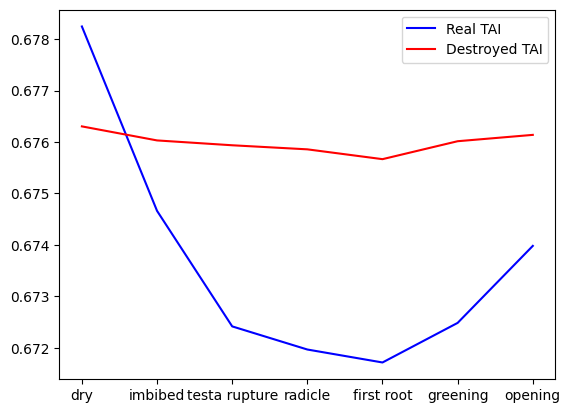

In [17]:
new_data = expression_data.remove_genes(ga_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")

plt.legend()
plt.show()

In [18]:
new_tai_var = np.var(new_data.tai).item()
print("destroyed TAI p-value:", get_p_value(new_tai_var))

destroyed TAI p-value: 0.6212942474241432


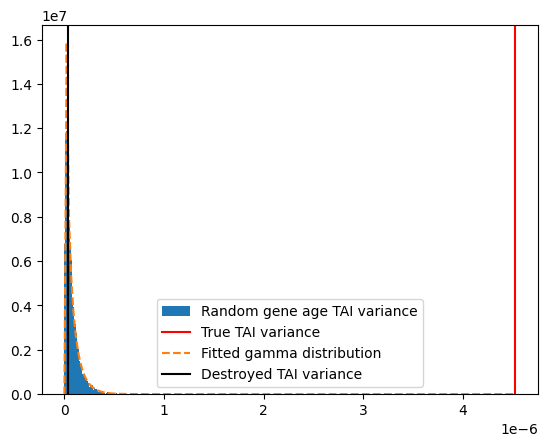

In [19]:
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")


x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")
plt.axvline(x=new_tai_var, label="Destroyed TAI variance", color="black")
plt.legend()
plt.show()

### 3.3 Benchmark GA against greedy removal of genes with highest variance

In [20]:
gene_variances = expression_data.gene_variances.sort_values('Variance', ascending=False)
gene_variances

,Phylostratum,GeneID,Variance
5072,0.963841,at1g68250,686.615332
9478,0.963841,at2g41260,587.813111
6674,0.963841,at2g05580,427.328322
21357,0.963841,at5g35660,410.527599
2857,0.963841,at1g32560,382.200755
...,...,...,...
22184,0.618291,at5g44640,0.000644
9210,0.926134,at2g38690,0.000595
117,0.618291,at1g02250,0.000572
2381,0.699120,at1g27220,0.000491


In [21]:
k_top = len(ga_genes)

highest_var_genes = gene_variances.head(k_top)['GeneID'].to_numpy()

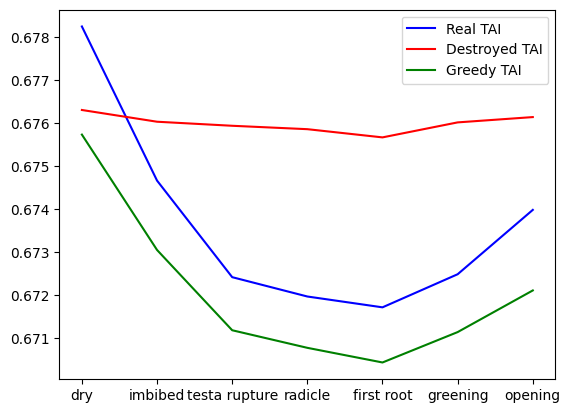

In [22]:
greedy_data = expression_data.remove_genes(highest_var_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")
plt.plot(greedy_data.tai, label="Greedy TAI", color="green")

plt.legend()
plt.show()

In [23]:
greedy_tai_var = np.var(greedy_data.tai).item()
print("p-value: ", get_p_value(greedy_tai_var))

p-value:  7.266877179222137e-15


Conversely, however, the genes that were extracted by GATAI tend to have a high variance (but they need to be carefully selected, it's not as simple as picking the most variant ones, hence the need for the GA approach)

In [24]:
common_genes = np.intersect1d(ga_genes, highest_var_genes)

print("Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset:", len(common_genes), "out of", len(ga_genes))

Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset: 206 out of 796
